# Introduction 

This note will perform more deeply question driven analysis, and potentially new algorithm development
<br>Only focus on Donor9

In [167]:
setwd("/lab/solexa_weissman/cweng/Projects/MitoTracing_Velocity/SecondaryAnalysis/Donor4Donor9")

# Configure

In [182]:
source("activate.R") # Can skip this if put in .Rprofile 
Sys.setenv(RENV_PATHS_CACHE = "/lab/solexa_weissman/cweng/Packages/R/x86_64-pc-linux-gnu-library/4.1-focal") 
renv::paths$cache()


[1] "/lab/solexa_weissman/cweng/Packages/R/x86_64-pc-linux-gnu-library/4.1-focal/v5/R-4.1/x86_64-pc-linux-gnu"

In [169]:
library(EZsinglecell2)
library(scMitoTracing)
library(gridExtra)
library(BuenColors)

In [170]:
library(dplyr)
library(reshape2)

In [ ]:
# Install the rethinking package for baysian regression
install.packages(c("coda","mvtnorm","devtools"))
library(devtools)
devtools::install_github("rmcelreath/rethinking")

In [184]:
install.packages("/lab/solexa_weissman/cweng/Packages/scMitoTracing/")

Installing scMitoTracing [0.0.0.9000] ...
	OK [built from source]


In [183]:
detach("package:scMitoTracing", unload=T)

In [185]:
library(scMitoTracing)

Warning message:
“replacing previous import ‘Matrix::expand’ by ‘ggtree::expand’ when loading ‘scMitoTracing’”
Warning message:
“replacing previous import ‘ape::rotate’ by ‘ggtree::rotate’ when loading ‘scMitoTracing’”
Warning message:
“replacing previous import ‘dplyr::combine’ by ‘gridExtra::combine’ when loading ‘scMitoTracing’”
Warning message:
“replacing previous import ‘Matrix::cov2cor’ by ‘stats::cov2cor’ when loading ‘scMitoTracing’”
Warning message:
“replacing previous import ‘dplyr::filter’ by ‘stats::filter’ when loading ‘scMitoTracing’”
Warning message:
“replacing previous import ‘dplyr::lag’ by ‘stats::lag’ when loading ‘scMitoTracing’”
Warning message:
“replacing previous import ‘Matrix::toeplitz’ by ‘stats::toeplitz’ when loading ‘scMitoTracing’”
Warning message:
“replacing previous import ‘Matrix::update’ by ‘stats::update’ when loading ‘scMitoTracing’”
Warning message:
“replacing previous import ‘stats::filter’ by ‘tidytree::filter’ when loading ‘scMitoTracing’”
Warnin

In [68]:
ComputeRejectRate

function (WD) 
{
    Total <- read.table(paste(WD, "/RawGenotypes.Total.StrandBalance", 
        sep = ""))
    VerySensitive <- read.table(paste(WD, "/RawGenotypes.VerySensitive.StrandBalance", 
        sep = ""))
    Sensitive <- read.table(paste(WD, "/RawGenotypes.Sensitive.StrandBalance", 
        sep = ""))
    Specific <- read.table(paste(WD, "/RawGenotypes.Specific.StrandBalance", 
        sep = ""))
    res <- Total %>% group_by(V2) %>% dplyr::summarise(Total = n())
    res <- VerySensitive %>% group_by(V2) %>% dplyr::summarise(VerySensitive = n()) %>% 
        merge(res, ., by = "V2")
    res <- Sensitive %>% group_by(V2) %>% dplyr::summarise(Sensitive = n()) %>% 
        merge(res, ., by = "V2")
    res <- Specific %>% group_by(V2) %>% dplyr::summarise(Specific = n()) %>% 
        merge(res, ., by = "V2")
    res <- res %>% mutate(VerySensitive = VerySensitive/Total) %>% 
        mutate(Sensitive = Sensitive/Total) %>% mutate(Specific = Specific/Total)
    colnames(res)[1] <- "Cell"
    return(res)
}
<bytecode: 0x5635a290f748>
<environment: namespace:scMitoTracing>

# Load

## Load mito mutation data

### BMMC

In [190]:
## Fast load
WD<-"/lab/solexa_weissman/cweng/Projects/MitoTracing_Velocity/SecondaryAnalysis/Donor4Donor9/Donor9/DN9_BMMC/MTenrichCombine/mitoV/final"
DN9_BMMC.depth<-readRDS(paste(WD,"/DN9_BMMC.depth",sep=""))
DN9_BMMC.VariantsGTSummary<-CW_mgatk.read(WD,Processed =T)
DN9_BMMC.Variants.feature.lst<-Vfilter_v3(InputSummary=DN9_BMMC.VariantsGTSummary,depth=DN9_BMMC.depth)

[1] "Total :\n 48154 variants to start"
[1] "47959 variants after remove low quality cells"
 [1] "Tag Homoplasmy: 1438_A_G"  "Tag Homoplasmy: 15326_A_G"
 [3] "Tag Homoplasmy: 16188_C_G" "Tag Homoplasmy: 16519_T_C"
 [5] "Tag Homoplasmy: 263_A_G"   "Tag Homoplasmy: 3010_G_A" 
 [7] "Tag Homoplasmy: 4769_A_G"  "Tag Homoplasmy: 4859_T_C" 
 [9] "Tag Homoplasmy: 750_A_G"   "Tag Homoplasmy: 8860_A_G" 
[1] "After filtering, 5995 Variants left"
[1] "\n\n"
[1] "VerySensitive :\n 45796 variants to start"
[1] "45398 variants after remove low quality cells"
 [1] "Tag Homoplasmy: 1438_A_G"  "Tag Homoplasmy: 15326_A_G"
 [3] "Tag Homoplasmy: 16188_C_G" "Tag Homoplasmy: 16519_T_C"
 [5] "Tag Homoplasmy: 263_A_G"   "Tag Homoplasmy: 3010_G_A" 
 [7] "Tag Homoplasmy: 4769_A_G"  "Tag Homoplasmy: 4859_T_C" 
 [9] "Tag Homoplasmy: 750_A_G"   "Tag Homoplasmy: 8860_A_G" 
[1] "After filtering, 4670 Variants left"
[1] "\n\n"
[1] "Sensitive :\n 42762 variants to start"
[1] "42188 variants after remove low quality cel

### HPC

In [191]:
## Fast load
WD<-"/lab/solexa_weissman/cweng/Projects/MitoTracing_Velocity/SecondaryAnalysis/Donor4Donor9/Donor9/DN9_HPC/MTenrichCombine/mitoV/final"
DN9_HPC.depth<-readRDS(paste(WD,"/DN9_HPC.depth",sep=""))
DN9_HPC.VariantsGTSummary<-CW_mgatk.read(WD,Processed =T)
DN9_HPC.Variants.feature.lst<-Vfilter_v3(InputSummary=DN9_HPC.VariantsGTSummary,depth=DN9_HPC.depth)

[1] "Total :\n 48603 variants to start"
[1] "48556 variants after remove low quality cells"
 [1] "Tag Homoplasmy: 1438_A_G"  "Tag Homoplasmy: 15326_A_G"
 [3] "Tag Homoplasmy: 16188_C_G" "Tag Homoplasmy: 16519_T_C"
 [5] "Tag Homoplasmy: 263_A_G"   "Tag Homoplasmy: 3010_G_A" 
 [7] "Tag Homoplasmy: 4769_A_G"  "Tag Homoplasmy: 4859_T_C" 
 [9] "Tag Homoplasmy: 750_A_G"   "Tag Homoplasmy: 8860_A_G" 
[1] "After filtering, 7140 Variants left"
[1] "\n\n"
[1] "VerySensitive :\n 46615 variants to start"
[1] "46525 variants after remove low quality cells"
 [1] "Tag Homoplasmy: 1438_A_G"  "Tag Homoplasmy: 15326_A_G"
 [3] "Tag Homoplasmy: 16188_C_G" "Tag Homoplasmy: 16519_T_C"
 [5] "Tag Homoplasmy: 263_A_G"   "Tag Homoplasmy: 3010_G_A" 
 [7] "Tag Homoplasmy: 4769_A_G"  "Tag Homoplasmy: 4859_T_C" 
 [9] "Tag Homoplasmy: 750_A_G"   "Tag Homoplasmy: 8860_A_G" 
[1] "After filtering, 5735 Variants left"
[1] "\n\n"
[1] "Sensitive :\n 43003 variants to start"
[1] "42867 variants after remove low quality cel

### HSC

In [192]:
## Fast load
WD<-"/lab/solexa_weissman/cweng/Projects/MitoTracing_Velocity/SecondaryAnalysis/Donor4Donor9/Donor9/DN9_HSC/MTenrichCombine/mitoV/final"
DN9_HSC.depth<-readRDS(paste(WD,"/DN9_HSC.depth",sep=""))
DN9_HSC.VariantsGTSummary<-CW_mgatk.read(WD,Processed =T)
DN9_HSC.Variants.feature.lst<-Vfilter_v3(InputSummary=DN9_HSC.VariantsGTSummary,depth=DN9_HSC.depth)

[1] "Total :\n 48823 variants to start"
[1] "48797 variants after remove low quality cells"
 [1] "Tag Homoplasmy: 1438_A_G"  "Tag Homoplasmy: 15326_A_G"
 [3] "Tag Homoplasmy: 16188_C_G" "Tag Homoplasmy: 16519_T_C"
 [5] "Tag Homoplasmy: 263_A_G"   "Tag Homoplasmy: 3010_G_A" 
 [7] "Tag Homoplasmy: 4769_A_G"  "Tag Homoplasmy: 4859_T_C" 
 [9] "Tag Homoplasmy: 750_A_G"   "Tag Homoplasmy: 8860_A_G" 
[1] "After filtering, 7449 Variants left"
[1] "\n\n"
[1] "VerySensitive :\n 47029 variants to start"
[1] "46967 variants after remove low quality cells"
 [1] "Tag Homoplasmy: 1438_A_G"  "Tag Homoplasmy: 15326_A_G"
 [3] "Tag Homoplasmy: 16188_C_G" "Tag Homoplasmy: 16519_T_C"
 [5] "Tag Homoplasmy: 263_A_G"   "Tag Homoplasmy: 3010_G_A" 
 [7] "Tag Homoplasmy: 4769_A_G"  "Tag Homoplasmy: 4859_T_C" 
 [9] "Tag Homoplasmy: 750_A_G"   "Tag Homoplasmy: 8860_A_G" 
[1] "After filtering, 5953 Variants left"
[1] "\n\n"
[1] "Sensitive :\n 43222 variants to start"
[1] "43114 variants after remove low quality cel

## Load Seurat

In [193]:
Donor09_BMMC_Multiome_wrapper<-readRDS("/lab/solexa_weissman/cweng/Projects/MitoTracing_Velocity/SecondaryAnalysis/Donor4Donor9/RDS/Donor09_BMMC_Multiome_wrapper.rds")
Donor09_HPC_Multiome_wrapper<-readRDS("/lab/solexa_weissman/cweng/Projects/MitoTracing_Velocity/SecondaryAnalysis/Donor4Donor9/RDS/Donor09_HPC_Multiome_wrapper.rds")
Donor09_HSC_Multiome_wrapper<-readRDS("/lab/solexa_weissman/cweng/Projects/MitoTracing_Velocity/SecondaryAnalysis/Donor4Donor9/RDS/Donor09_HSC_Multiome_wrapper.rds")

# Combine data Make _mitoTracing

## Make meta and create HSC_HPC_BMMC_mitoTracing

In [174]:
Donor09_BMMC.meta %>% head

orig.ident    nCount_RNA nFeature_RNA nCount_ATAC
AAACAGCCAATTAACC-1 SeuratProject 9526       2966          5684      
AAACAGCCAGCCAGTT-1 SeuratProject 8581       3429         17689      
AAACAGCCAGGCCTTG-1 SeuratProject 3203       1553         13151      
AAACAGCCATCTAGCA-1 SeuratProject 1007        703          6407      
AAACATGCAAACTCAT-1 SeuratProject 4293       2047          5143      
AAACATGCAGCTTAGC-1 SeuratProject 1037        586          6760      
                   nFeature_ATAC nCount_SCT nFeature_SCT SCT.weight ATAC.weight
AAACAGCCAATTAACC-1 2746          3024       1435         0.66331150 0.3366885  
AAACAGCCAGCCAGTT-1 7235          2912       1666         0.68230826 0.3176917  
AAACAGCCAGGCCTTG-1 5535          3051       1552         0.05627516 0.9437248  
AAACAGCCATCTAGCA-1 3041          2109        731         0.60621609 0.3937839  
AAACATGCAAACTCAT-1 2456          3253       2045         0.67265482 0.3273452  
AAACATGCAGCTTAGC-1 2966          2132        622         0.56776668 0.4322333  
                   wsnn_res.0.8 seurat_clusters CellType ATACName        
AAACAGCCAATTAACC-1 4            4               Ery      ACAGCGGGTATCGGCC
AAACAGCCAGCCAGTT-1 4            4               Ery      ACAGCGGGTACGGTTT
AAACAGCCAGGCCTTG-1 4            4               Ery      ACAGCGGGTCATGAAG
AAACAGCCATCTAGCA-1 1            1               Mono     ACAGCGGGTTTAACCA
AAACATGCAAACTCAT-1 0            0               CD4      CATTTAGGTCAGTGCC
AAACATGCAGCTTAGC-1 5            5               Ery      CATTTAGGTCTATCTT

In [8]:
Donor09_BMMC.meta<-Translate_RNA2ATAC(meta=Donor09_BMMC_Multiome_wrapper$seurat@meta.data)
Donor09_HPC.meta<-Translate_RNA2ATAC(meta=Donor09_HPC_Multiome_wrapper$seurat@meta.data)
Donor09_HSC.meta<-Translate_RNA2ATAC(meta=Donor09_HSC_Multiome_wrapper$seurat@meta.data)

<code style="background:purple;color:black">Below generate HSC_HPC_BMMC_mitoTracing.Sensitive and HSC_HPC_BMMC_mitoTracing.VerySensitive</code>

In [178]:
HSC_HPC_BMMC_mitoTracing.Sensitive<-Create_mitoTracing(GTsummary_list=list(DN9_HSC.VariantsGTSummary,DN9_HPC.VariantsGTSummary,DN9_BMMC.VariantsGTSummary),
                depth_list=list(DN9_HSC.depth,DN9_HPC.depth,DN9_BMMC.depth),
                feature.list_list=list(DN9_HSC.Variants.feature.lst,DN9_HPC.Variants.feature.lst,DN9_BMMC.Variants.feature.lst),
                meta_list=list(Donor09_HSC.meta,Donor09_HPC.meta,Donor09_BMMC.meta),
                labels=c("HSC","HPC","BMMC"),,thr="Sensitive")
HSC_HPC_BMMC_mitoTracing.Sensitive<-Make_matrix(HSC_HPC_BMMC_mitoTracing.Sensitive)
HSC_HPC_BMMC_mitoTracing.Sensitive<-SeuratLSIClustering(HSC_HPC_BMMC_mitoTracing.Sensitive)
HSC_HPC_BMMC_mitoTracing.Sensitive<-AddDatatoplot_clustering(HSC_HPC_BMMC_mitoTracing.Sensitive)

Performing TF-IDF normalization

Running SVD

Scaling cell embeddings

19:57:23 UMAP embedding parameters a = 0.9922 b = 1.112

19:57:23 Read 26618 rows and found 20 numeric columns

19:57:23 Using Annoy for neighbor search, n_neighbors = 30

19:57:23 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

19:57:35 Writing NN index file to temp file /tmp/Rtmpa8VxRw/file1db45d8d87b8

19:57:35 Searching Annoy index using 1 thread, search_k = 3000

19:57:47 Annoy recall = 99.8%

19:57:55 Commencing smooth kNN distance calibration using 1 thread

19:57:56 83 smooth knn distance failures

19:58:07 Initializing from normalized Laplacian + noise

19:58:37 Commencing optimization for 200 epochs, with 1161980 positive edges

19:58:57 Optimization finished

Computing nearest neighbor gr

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 26618
Number of edges: 792133

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9760
Number of communities: 56
Elapsed time: 3 seconds


In [56]:
HSC_HPC_BMMC_mitoTracing.VerySensitive<-Create_mitoTracing(GTsummary_list=list(DN9_HSC.VariantsGTSummary,DN9_HPC.VariantsGTSummary,DN9_BMMC.VariantsGTSummary),
                depth_list=list(DN9_HSC.depth,DN9_HPC.depth,DN9_BMMC.depth),
                feature.list_list=list(DN9_HSC.Variants.feature.lst,DN9_HPC.Variants.feature.lst,DN9_BMMC.Variants.feature.lst),
                meta_list=list(Donor09_HSC.meta,Donor09_HPC.meta,Donor09_BMMC.meta),
                labels=c("HSC","HPC","BMMC"),,thr="VerySensitive")
HSC_HPC_BMMC_mitoTracing.VerySensitive<-Make_matrix(HSC_HPC_BMMC_mitoTracing.VerySensitive)
HSC_HPC_BMMC_mitoTracing.VerySensitive<-SeuratLSIClustering(HSC_HPC_BMMC_mitoTracing.VerySensitive)
HSC_HPC_BMMC_mitoTracing.VerySensitive<-AddDatatoplot_clustering(HSC_HPC_BMMC_mitoTracing.VerySensitive)

Performing TF-IDF normalization

Running SVD

Scaling cell embeddings

10:45:44 UMAP embedding parameters a = 0.9922 b = 1.112

10:45:44 Read 26713 rows and found 20 numeric columns

10:45:44 Using Annoy for neighbor search, n_neighbors = 30

10:45:44 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

10:45:56 Writing NN index file to temp file /tmp/Rtmpa8VxRw/file1db469f1e2f2

10:45:56 Searching Annoy index using 1 thread, search_k = 3000

10:46:08 Annoy recall = 99.86%

10:46:15 Commencing smooth kNN distance calibration using 1 thread

10:46:15 9 smooth knn distance failures

10:46:26 Initializing from normalized Laplacian + noise

10:46:32 Commencing optimization for 200 epochs, with 1126762 positive edges

10:46:50 Optimization finished

Computing nearest neighbor gr

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 26713
Number of edges: 806143

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9769
Number of communities: 59
Elapsed time: 2 seconds


In [58]:
# saveRDS(HSC_HPC_BMMC_mitoTracing.VerySensitive,"/lab/solexa_weissman/cweng/Projects/MitoTracing_Velocity/SecondaryAnalysis/Donor4Donor9/RDS/DN9_HSC_HPC_BMMC_mitoTracing.verysensitive")
# saveRDS(HSC_HPC_BMMC_mitoTracing.Sensitive,"/lab/solexa_weissman/cweng/Projects/MitoTracing_Velocity/SecondaryAnalysis/Donor4Donor9/RDS/DN9_HSC_HPC_BMMC_mitoTracing.Sensitive")

In [ ]:
HSC_HPC_BMMC_mitoTracing.VerySensitive<-readRDS("/lab/solexa_weissman/cweng/Projects/MitoTracing_Velocity/SecondaryAnalysis/Donor4Donor9/RDS/DN9_HSC_HPC_BMMC_mitoTracing.verysensitive")
HSC_HPC_BMMC_mitoTracing.Sensitive<-readRDS("/lab/solexa_weissman/cweng/Projects/MitoTracing_Velocity/SecondaryAnalysis/Donor4Donor9/RDS/DN9_HSC_HPC_BMMC_mitoTracing.Sensitive")

In [14]:
HSC_HPC_BMMC_mitoTracing@CellMeta$CellType2<-paste(HSC_HPC_BMMC_mitoTracing@CellMeta$Label,HSC_HPC_BMMC_mitoTracing@CellMeta$CellType,sep="_")

# Coverage analysis by cell types

Warning message:
“Removed 186 rows containing non-finite values (stat_boxplot).”


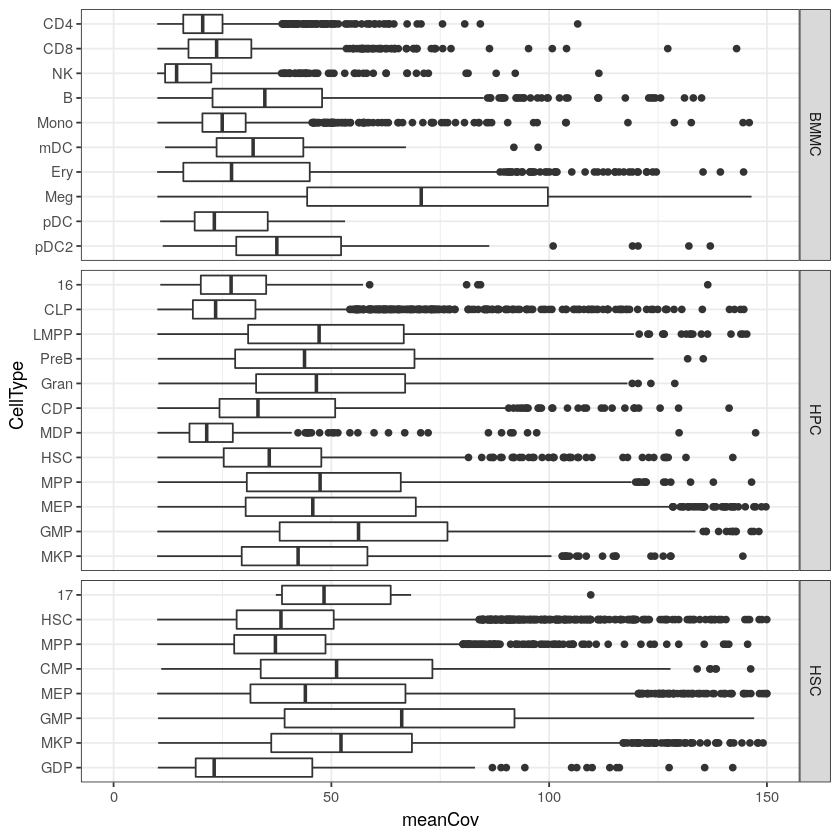

In [15]:
ggplot(HSC_HPC_BMMC_mitoTracing@CellMeta)+aes(CellType,meanCov)+geom_boxplot()+facet_grid(Label~.,space = "free",scales="free")+coord_flip()+ylim(0,150)+theme_bw()

# Cell level mutation burden

In [32]:
table(CheckVNumber$CellType2)


   BMMC_B  BMMC_CD4  BMMC_CD8  BMMC_Ery  BMMC_mDC  BMMC_Meg BMMC_Mono   BMMC_NK 
     1044      2027      1643      1014        52       266      1051       567 
 BMMC_pDC BMMC_pDC2    HPC_16   HPC_CDP   HPC_CLP   HPC_GMP  HPC_Gran   HPC_HSC 
       20        72       104       370      2264      1221       240       747 
 HPC_LMPP   HPC_MDP   HPC_MEP   HPC_MKP   HPC_MPP  HPC_PreB    HSC_17   HSC_CMP 
      456       189      1858       365       910       150         7       257 
  HSC_GDP   HSC_GMP   HSC_HSC   HSC_MEP   HSC_MKP   HSC_MPP 
      209       338      3510      2539      1761      1483 

## BMMC VS HPC vs HSC

In [73]:
# CheckVNumber<-subset(CheckVNumber,!CellType2 %in% c("HSC_CMP","HSC_GDP","HSC_GMP","HSC_MEP","HSC_MKP","HSC_MPP"))
CheckVNumber<-HSC_HPC_BMMC_mitoTracing@Cts.Mtx.bi %>% rowSums %>% Tomerge_v2(HSC_HPC_BMMC_mitoTracing@CellMeta,.)
CheckVNumber<-subset(CheckVNumber,!CellType2 %in% c("HSC_GDP","HSC_GMP"))

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'

Warning message:
“Removed 116 rows containing non-finite values (stat_smooth).”
Warning message:
“Removed 116 rows containing missing values (geom_point).”
Warning message:
“Removed 116 rows containing non-finite values (stat_density).”


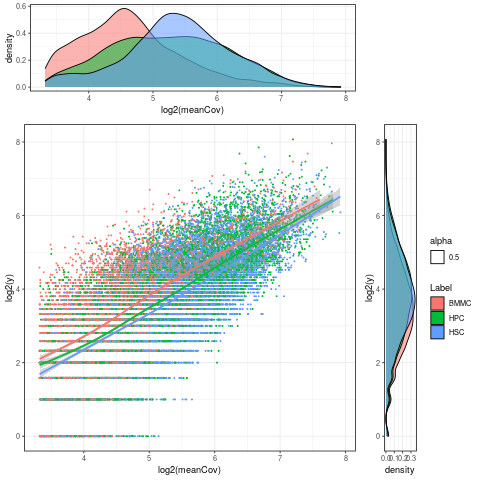

In [159]:
options(repr.plot.width=8, repr.plot.height=8,repr.plot.res=60)
laym<-rbind(c(2,2,2,NA),c(1,1,1,3),c(1,1,1,3),c(1,1,1,3))
p1<-ggplot(CheckVNumber)+aes(log2(meanCov),log2(y),color=Label)+geom_point(size=0.5)+theme_bw()+theme(legend.position="none")+geom_smooth()
p2<-ggplot(CheckVNumber)+aes(log2(meanCov),fill=Label,alpha=0.5)+geom_density()+theme_bw()+theme(legend.position="none")
p3<-ggplot(CheckVNumber)+aes(log2(y),fill=Label,alpha=0.5)+geom_density()+coord_flip()+theme_bw()
grid.arrange(p1,p2,p3,layout_matrix=laym)

## Across celltypes within BMMC

In [75]:
CheckVNumber<-HSC_HPC_BMMC_mitoTracing@Cts.Mtx.bi %>% rowSums %>% Tomerge_v2(HSC_HPC_BMMC_mitoTracing@CellMeta,.)
CheckVNumber<-subset(CheckVNumber,Label=="BMMC")

`geom_smooth()` using formula 'y ~ x'

Warning message:
“Removed 116 rows containing non-finite values (stat_smooth).”
Warning message in RColorBrewer::brewer.pal(n, pal):
“n too large, allowed maximum for palette Paired is 12
Returning the palette you asked for with that many colors
”
Warning message:
“Removed 10628 rows containing missing values (geom_point).”
Warning message in RColorBrewer::brewer.pal(n, pal):
“n too large, allowed maximum for palette Paired is 12
Returning the palette you asked for with that many colors
”
Warning message:
“Removed 116 rows containing non-finite values (stat_density).”
Warning message in RColorBrewer::brewer.pal(n, pal):
“n too large, allowed maximum for palette Paired is 12
Returning the palette you asked for with that many colors
”


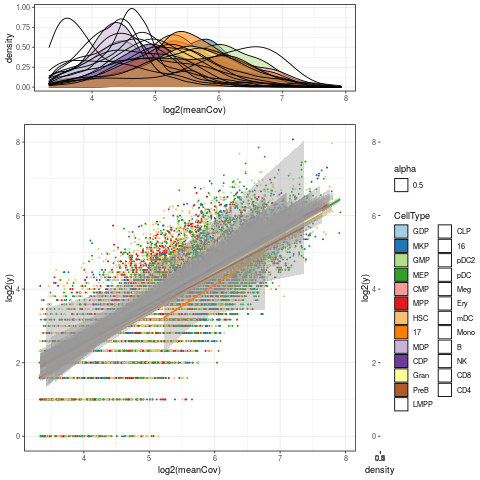

In [160]:
options(repr.plot.width=8, repr.plot.height=8,repr.plot.res=60)
laym<-rbind(c(2,2,2,NA),c(1,1,1,3),c(1,1,1,3),c(1,1,1,3))
p1<-ggplot(CheckVNumber)+aes(log2(meanCov),log2(y),color=CellType)+geom_point(size=0.5)+theme_bw()+theme(legend.position="none")+geom_smooth(method="lm")+scale_color_brewer(palette = "Paired")
p2<-ggplot(CheckVNumber)+aes(log2(meanCov),fill=CellType,alpha=0.5)+geom_density()+theme_bw()+theme(legend.position="none")+scale_fill_brewer(palette = "Paired")
p3<-ggplot(CheckVNumber)+aes(log2(y),fill=CellType,alpha=0.5)+geom_density()+coord_flip()+theme_bw()+scale_fill_brewer(palette = "Paired")
grid.arrange(p1,p2,p3,layout_matrix=laym)

## Across celltypes within HPC

In [78]:
CheckVNumber<-HSC_HPC_BMMC_mitoTracing@Cts.Mtx.bi %>% rowSums %>% Tomerge_v2(HSC_HPC_BMMC_mitoTracing@CellMeta,.)
CheckVNumber<-subset(CheckVNumber,Label=="HPC") %>% subset(.,CellType!="17")

In [10]:
options(repr.plot.width=8, repr.plot.height=8,repr.plot.res=300)
laym<-rbind(c(2,2,2,NA),c(1,1,1,3),c(1,1,1,3),c(1,1,1,3))
p1<-ggplot(CheckVNumber)+aes(log2(meanCov),log2(y),color=CellType)+geom_point(size=0.5)+theme_bw()+theme(legend.position="none")+geom_smooth(method="lm")+scale_color_brewer(palette = "Paired")
p2<-ggplot(CheckVNumber)+aes(log2(meanCov),fill=CellType,alpha=0.5)+geom_density()+theme_bw()+theme(legend.position="none")+scale_fill_brewer(palette = "Paired")
p3<-ggplot(CheckVNumber)+aes(log2(y),fill=CellType,alpha=0.5)+geom_density()+coord_flip()+theme_bw()+scale_fill_brewer(palette = "Paired")
grid.arrange(p1,p2,p3,layout_matrix=laym)

ERROR: Error in ggplot(CheckVNumber): object 'CheckVNumber' not found


## Across celltypes whin HSC

In [90]:
CheckVNumber<-HSC_HPC_BMMC_mitoTracing@Cts.Mtx.bi %>% rowSums %>% Tomerge_v2(HSC_HPC_BMMC_mitoTracing@CellMeta,.)
CheckVNumber<-subset(CheckVNumber,Label=="HSC")
CheckVNumber$CellType<-plyr::mapvalues(CheckVNumber$CellType,from="GDP","MDP")

In [11]:
options(repr.plot.width=8, repr.plot.height=8,repr.plot.res=300)
laym<-rbind(c(2,2,2,NA),c(1,1,1,3),c(1,1,1,3),c(1,1,1,3))
p1<-ggplot(CheckVNumber)+aes(log2(meanCov),log2(y),color=CellType)+geom_point(size=0.5)+theme_bw()+theme(legend.position="none")+geom_smooth(method="lm")+scale_color_brewer(palette = "Set1")
p2<-ggplot(CheckVNumber)+aes(log2(meanCov),fill=CellType,alpha=0.5)+geom_density()+theme_bw()+theme(legend.position="none")+scale_fill_brewer(palette = "Set1")
p3<-ggplot(CheckVNumber)+aes(log2(y),fill=CellType,alpha=0.5)+geom_density()+coord_flip()+theme_bw()+scale_fill_brewer(palette = "Set1")
grid.arrange(p1,p2,p3,layout_matrix=laym)

ERROR: Error in ggplot(CheckVNumber): object 'CheckVNumber' not found


## Try FamilySize drop normalization

In [12]:
WD<-"/lab/solexa_weissman/cweng/Projects/MitoTracing_Velocity/SecondaryAnalysis/Donor4Donor9/Donor9/DN9_BMMC/MTenrichCombine/mitoV/final"
Total<-read.table(paste(WD,"/RawGenotypes.Total.StrandBalance",sep=""))
BMMC.FamilyDrop<-Total %>% group_by(V2) %>% dplyr::summarise(FamilyDrop=1-sum(V8>=3)/n()) %>% as.data.frame()
row.names(BMMC.FamilyDrop)<-paste(BMMC.FamilyDrop$V2,"3",sep="_")  ##  The order is "HSC","HPC","BMMC" in 4.1 

In [13]:
WD<-"/lab/solexa_weissman/cweng/Projects/MitoTracing_Velocity/SecondaryAnalysis/Donor4Donor9/Donor9/DN9_HPC/MTenrichCombine/mitoV/final"
Total<-read.table(paste(WD,"/RawGenotypes.Total.StrandBalance",sep=""))
HPC.FamilyDrop<-Total %>% group_by(V2) %>% dplyr::summarise(FamilyDrop=1-sum(V8>=3)/n())  %>% as.data.frame()
row.names(HPC.FamilyDrop)<-paste(HPC.FamilyDrop$V2,"2",sep="_")

In [14]:
WD<-"/lab/solexa_weissman/cweng/Projects/MitoTracing_Velocity/SecondaryAnalysis/Donor4Donor9/Donor9/DN9_HSC/MTenrichCombine/mitoV/final"
Total<-read.table(paste(WD,"/RawGenotypes.Total.StrandBalance",sep=""))
HSC.FamilyDrop<-Total %>% group_by(V2) %>% dplyr::summarise(FamilyDrop=1-sum(V8>=3)/n())  %>% as.data.frame()
row.names(HSC.FamilyDrop)<-paste(HSC.FamilyDrop$V2,"1",sep="_")

In [38]:
HSC_HPC_BMMC_FamilyDrop<-rbind(BMMC.FamilyDrop,HPC.FamilyDrop,HSC.FamilyDrop)

In [40]:
# row.names(HSC_HPC_BMMC_mitoTracing@CellMeta)<-HSC_HPC_BMMC_mitoTracing@CellMeta$Cell
Meta<-Tomerge_v2(HSC_HPC_BMMC_mitoTracing@CellMeta,HSC_HPC_BMMC_FamilyDrop[,"FamilyDrop",drop=F]) 

In [49]:
CheckVNumber<-HSC_HPC_BMMC_mitoTracing@Cts.Mtx %>% rowSums %>% Tomerge_v2(Meta,.)

In [50]:
CheckVNumber$Alpha<-CheckVNumber$y/((1-CheckVNumber$FamilyDrop)*CheckVNumber$meanCov)
CheckVNumber$yPerCov<-CheckVNumber$y/CheckVNumber$meanCov

In [51]:
head(CheckVNumber)

Cell               meanCov  orig.ident    nCount_RNA
AAACAAGCAAACAAAG_1 AAACAAGCAAACAAAG_1 40.03543 SeuratProject 1894      
AAACAAGCAAACCTAG_3 AAACAAGCAAACCTAG_3 13.78074 SeuratProject 2073      
AAACAAGCAACCAAAT_3 AAACAAGCAACCAAAT_3 39.95280 SeuratProject 1809      
AAACAAGCAAGGATTT_3 AAACAAGCAAGGATTT_3 16.03832 SeuratProject 2515      
AAACAAGCAAGGCTGT_2 AAACAAGCAAGGCTGT_2 35.04925 SeuratProject 1284      
AAACAAGCAAGGCTTA_1 AAACAAGCAAGGCTTA_1 56.99559 SeuratProject 3896      
                   nFeature_RNA nCount_ATAC nFeature_ATAC nCount_SCT
AAACAAGCAAACAAAG_1 1229         14678       6783          4007      
AAACAAGCAAACCTAG_3 1210         10202       4443          2315      
AAACAAGCAACCAAAT_3 1178         11157       4850          2234      
AAACAAGCAAGGATTT_3 1540         10673       4697          2531      
AAACAAGCAAGGCTGT_2  802         16852       7795          3966      
AAACAAGCAAGGCTTA_1 1985         15964       7353          4254      
                   nFeature_SCT SCT.weight ATAC.weight wsnn_res.0.8
AAACAAGCAAACAAAG_1 1304         0.5000000  0.5000000   0           
AAACAAGCAAACCTAG_3 1209         0.4727194  0.5272806   0           
AAACAAGCAACCAAAT_3 1177         0.5000000  0.5000000   11          
AAACAAGCAAGGATTT_3 1539         0.6981657  0.3018343   6           
AAACAAGCAAGGCTGT_2 1258         0.5818516  0.4181484   0           
AAACAAGCAAGGCTTA_1 1985         0.5576044  0.4423956   4           
                   seurat_clusters CellType Label FamilyDrop y  Alpha    
AAACAAGCAAACAAAG_1 0               HSC      HSC   0.2645740  38 1.2906252
AAACAAGCAAACCTAG_3 0               CD4      BMMC  0.1344538   4 0.3353493
AAACAAGCAACCAAAT_3 11              B        BMMC  0.1452381   9 0.2635422
AAACAAGCAAGGATTT_3 6               NK       BMMC  0.1419355   9 0.6539786
AAACAAGCAAGGCTGT_2 0               CLP      HPC   0.2486034   9 0.3417390
AAACAAGCAAGGCTTA_1 4               MEP      HSC   0.2212838  25 0.5632737
                   yPerCov  
AAACAAGCAAACAAAG_1 0.9491593
AAACAAGCAAACCTAG_3 0.2902603
AAACAAGCAACCAAAT_3 0.2252658
AAACAAGCAAGGATTT_3 0.5611559
AAACAAGCAAGGCTGT_2 0.2567815
AAACAAGCAAGGCTTA_1 0.4386304

Warning message:
“Removed 116 rows containing non-finite values (stat_boxplot).”
Warning message:
“Removed 116 rows containing non-finite values (stat_boxplot).”


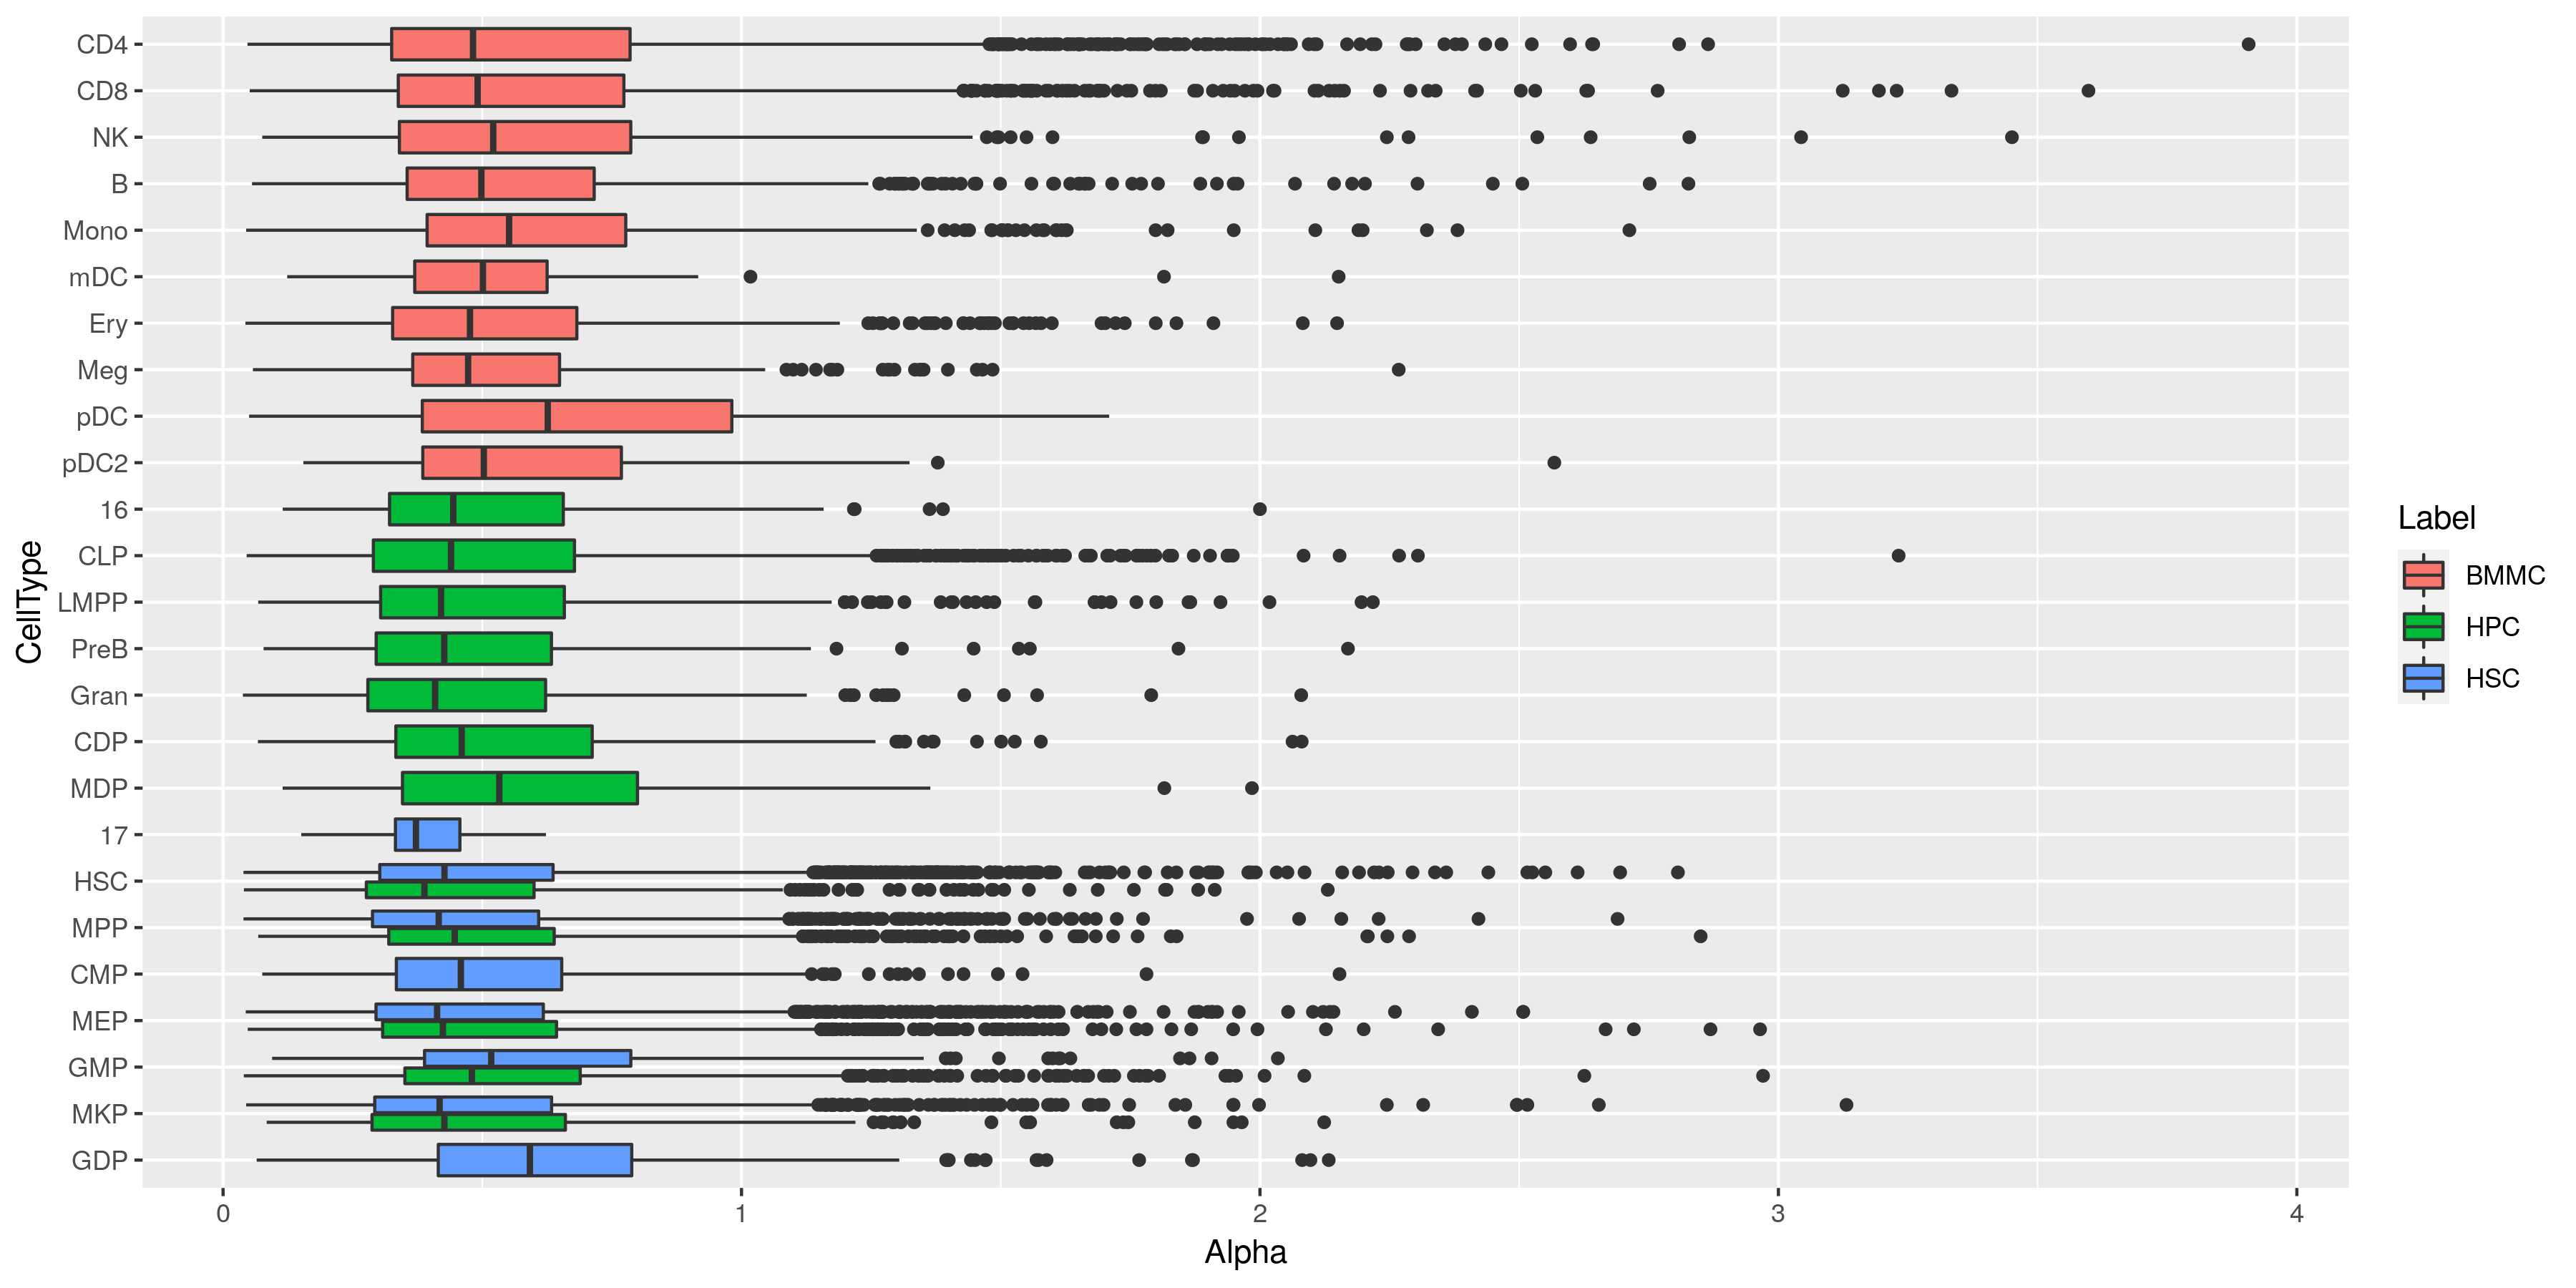

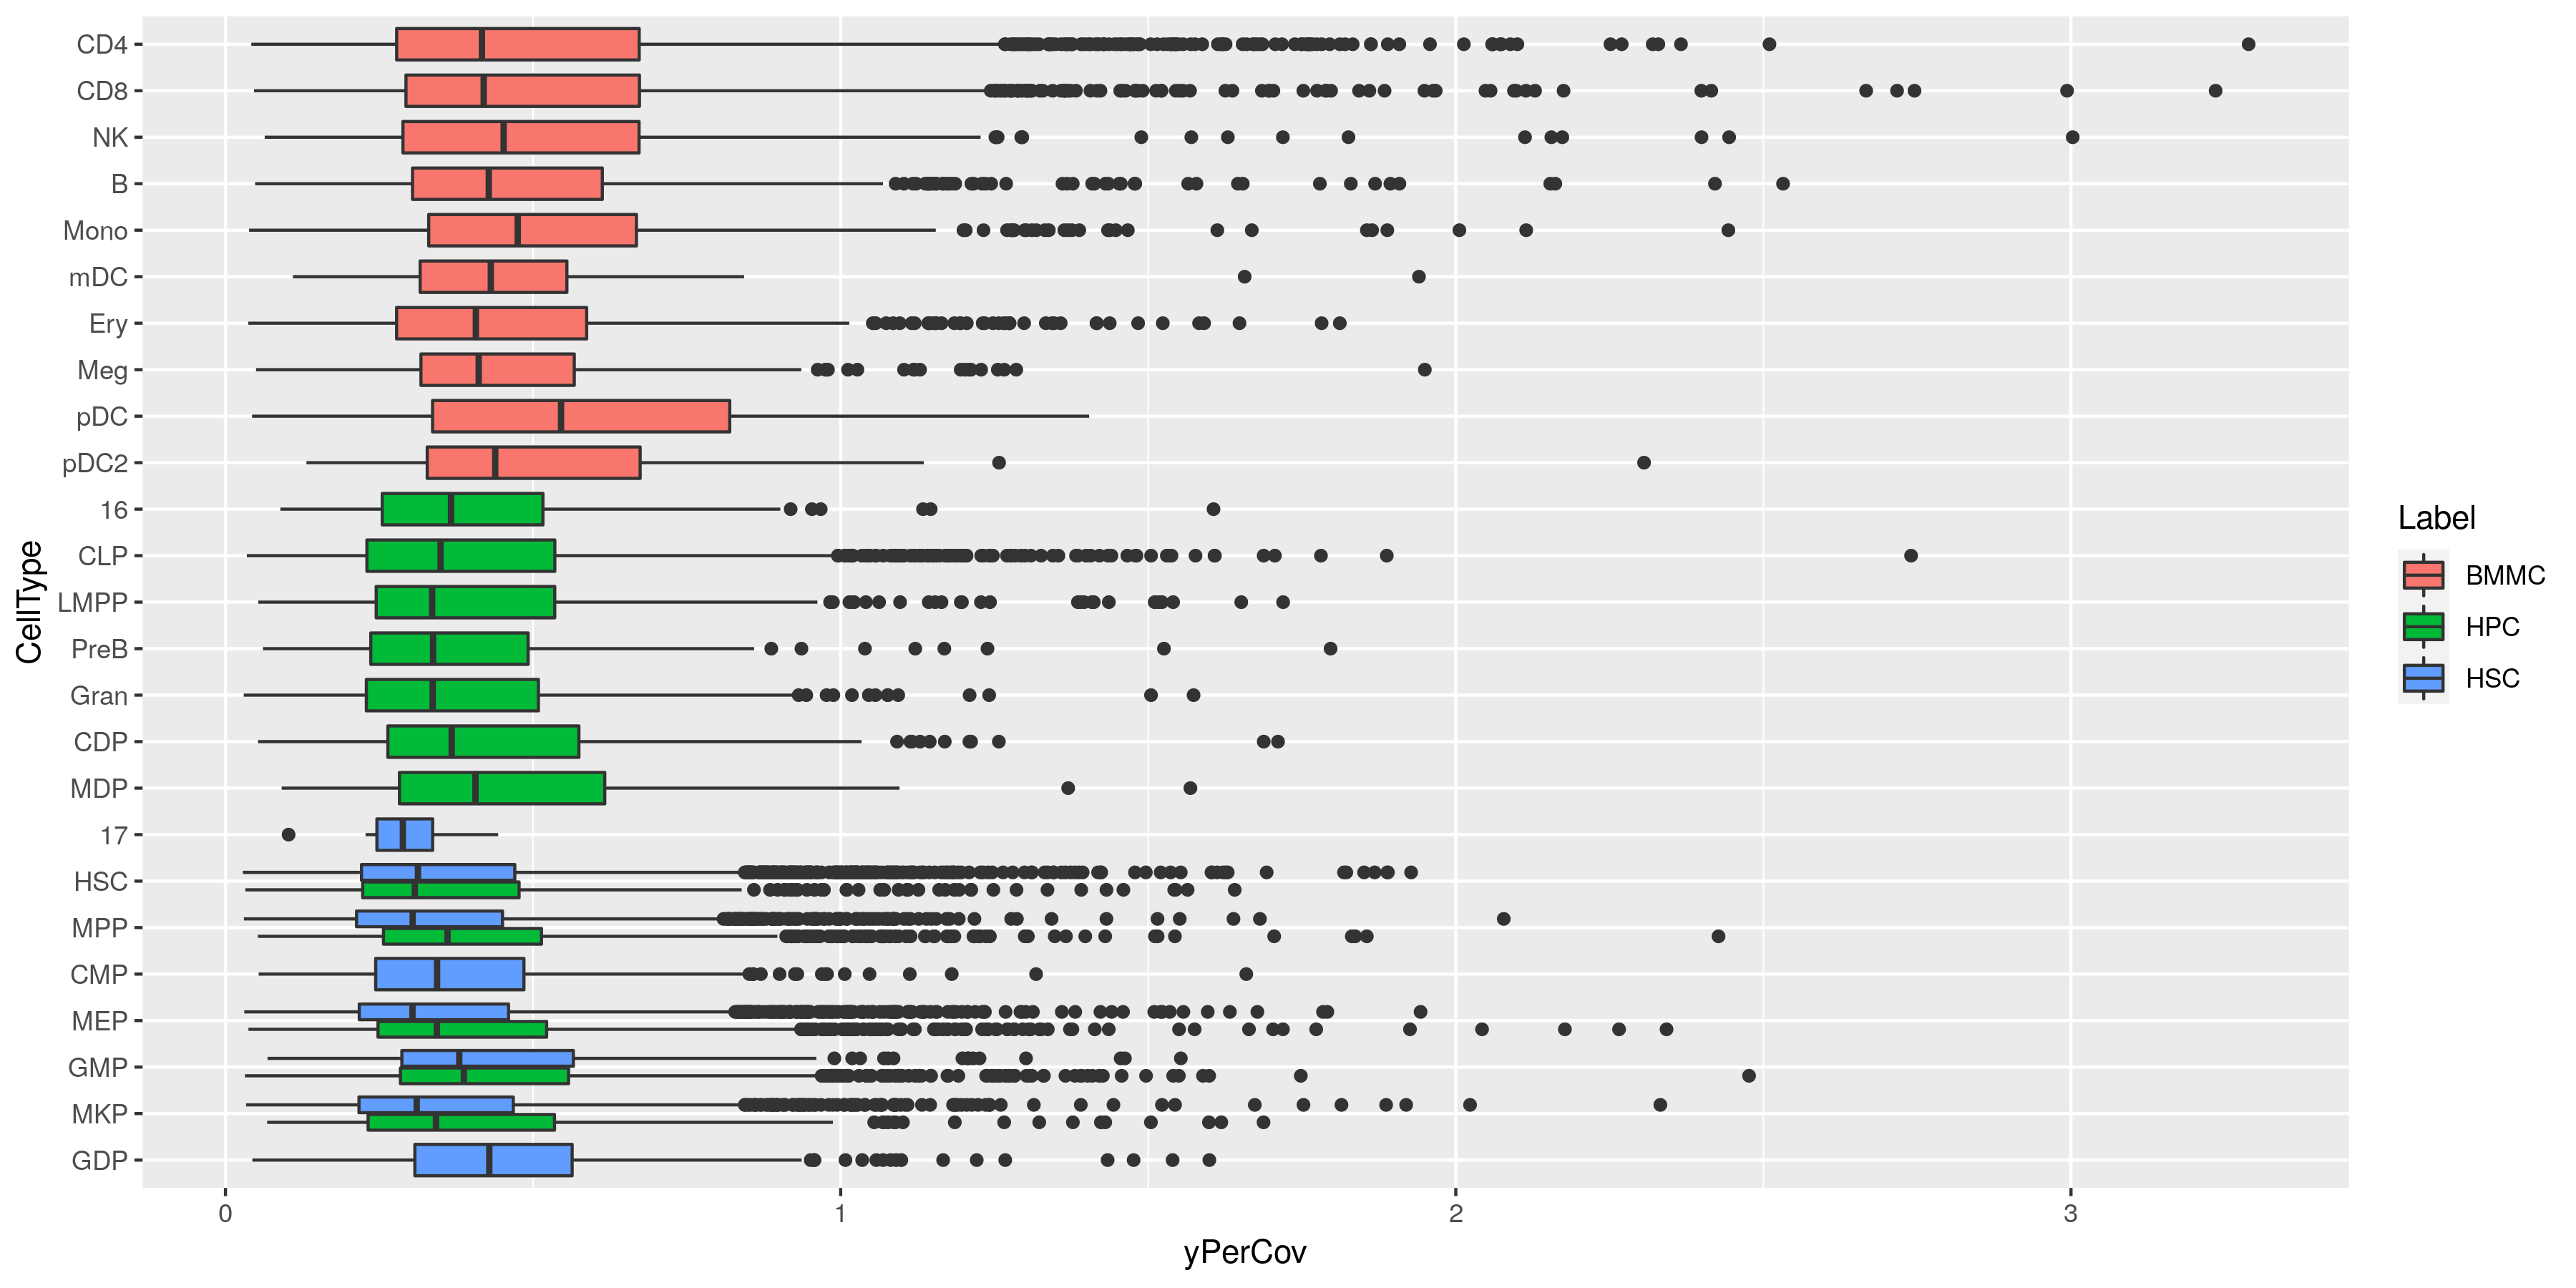

In [53]:
options(repr.plot.width=12,repr.plot.height=6,repr.plot.res=300)
ggplot(CheckVNumber)+aes(CellType,Alpha,fill=Label)+geom_boxplot()+coord_flip()
ggplot(CheckVNumber)+aes(CellType,yPerCov,fill=Label)+geom_boxplot()+coord_flip()
# ggplot(CheckVNumber)+aes(CellType,Alpha)+geom_boxplot()+coord_flip()
# ggplot(CheckVNumber)+aes(CellType,yPerCov)+geom_boxplot()+coord_flip()

## Try Normalize using Reject Rate

In [59]:
HSC_HPC_BMMC_mitoTracing.VerySensitive<-readRDS("/lab/solexa_weissman/cweng/Projects/MitoTracing_Velocity/SecondaryAnalysis/Donor4Donor9/RDS/DN9_HSC_HPC_BMMC_mitoTracing.verysensitive")
HSC_HPC_BMMC_mitoTracing.Sensitive<-readRDS("/lab/solexa_weissman/cweng/Projects/MitoTracing_Velocity/SecondaryAnalysis/Donor4Donor9/RDS/DN9_HSC_HPC_BMMC_mitoTracing.Sensitive")

In [69]:
DN9_BMMC_RejectRate<-ComputeRejectRate("/lab/solexa_weissman/cweng/Projects/MitoTracing_Velocity/SecondaryAnalysis/Donor4Donor9/Donor9/DN9_BMMC/MTenrichCombine/mitoV/final/")
DN9_HPC_RejectRate<-ComputeRejectRate("/lab/solexa_weissman/cweng/Projects/MitoTracing_Velocity/SecondaryAnalysis/Donor4Donor9/Donor9/DN9_HPC/MTenrichCombine/mitoV/final/")
DN9_HSC_RejectRate<-ComputeRejectRate("/lab/solexa_weissman/cweng/Projects/MitoTracing_Velocity/SecondaryAnalysis/Donor4Donor9/Donor9/DN9_HSC/MTenrichCombine/mitoV/final/")

In [71]:
DN9_BMMC.HPC.HSC_RejectRate<-rbind(DN9_BMMC_RejectRate %>% mutate(Cell=paste(Cell,"_3",sep="")),
                                   DN9_HPC_RejectRate %>% mutate(Cell=paste(Cell,"_2",sep="")),
                                   DN9_HSC_RejectRate %>% mutate(Cell=paste(Cell,"_1",sep="")))
DN9_BMMC.HPC.HSC_RejectRate<-DN9_BMMC.HPC.HSC_RejectRate %>% tibble::column_to_rownames(var = "Cell")

In [72]:
median(DN9_BMMC_RejectRate$VerySensitive)
median(DN9_HPC_RejectRate$VerySensitive)
median(DN9_HSC_RejectRate$VerySensitive)

[1] 0.9319864

[1] 0.9206897

[1] 0.9069925

In [73]:
median(DN9_BMMC_RejectRate$Sensitive)
median(DN9_HPC_RejectRate$Sensitive)
median(DN9_HSC_RejectRate$Sensitive)

[1] 0.8571429

[1] 0.8255814

[1] 0.7850877

In [74]:
median(DN9_BMMC_RejectRate$Specific)
median(DN9_HPC_RejectRate$Specific)
median(DN9_HSC_RejectRate$Specific)

[1] 0.8068966

[1] 0.75

[1] 0.6821705

<code style="background:yellow;color:black">Below is to generate the CheckVNumber.sensitive<br></code>
<code style="background:yellow;color:black">Binary works better than non-binary</code>

In [131]:
CheckVNumber.sensitive<-HSC_HPC_BMMC_mitoTracing.Sensitive@Cts.Mtx.bi %>% rowSums %>% Tomerge_v2(.,HSC_HPC_BMMC_mitoTracing.Sensitive@CellMeta) %>% Tomerge_v2(.,DN9_BMMC.HPC.HSC_RejectRate) %>% mutate(MutationBurden=100*x/(meanCov*Sensitive))
CheckVNumber.verysensitive<-HSC_HPC_BMMC_mitoTracing.VerySensitive@Cts.Mtx.bi %>% rowSums %>% Tomerge_v2(.,HSC_HPC_BMMC_mitoTracing.VerySensitive@CellMeta) %>% Tomerge_v2(.,DN9_BMMC.HPC.HSC_RejectRate) %>% mutate(MutationBurden=100*x/(meanCov*VerySensitive))

Warning message:
“Removed 51 rows containing non-finite values (stat_boxplot).”
Warning message:
“Removed 212 rows containing non-finite values (stat_boxplot).”


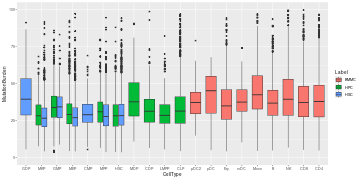

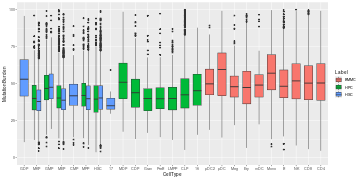

In [155]:
options(repr.plot.width=12,repr.plot.height=6,repr.plot.res=30)
ggplot(CheckVNumber.sensitive)+aes(CellType,MutationBurden,fill=Label)+geom_boxplot()+ylim(0,100)#+coord_flip()
ggplot(CheckVNumber.verysensitive)+aes(CellType,MutationBurden,fill=Label)+geom_boxplot()+ylim(0,100)#+coord_flip()


In [90]:
unique(CheckVNumber.sensitive$CellType)

[1] HSC  CD4  B    NK   CLP  MEP  CD8  MPP  GMP  MKP  GDP  Gran mDC  Mono Meg 
[16] Ery  PreB CDP  LMPP CMP  MDP  pDC2 16   pDC  17  
25 Levels: GDP MKP GMP MEP CMP MPP HSC 17 MDP CDP Gran PreB LMPP CLP ... CD4

<code style="background:yellow;color:black">Below three cells is to standarize cell names</code>

In [142]:
CheckVNumber.sensitive$STD.CellType<-plyr::mapvalues(CheckVNumber.sensitive$CellType,from=c("GDP","PreB","pDC2"),
                to=c("CDP","ProB","pDC"))
CheckVNumber.sensitive$STD.CellType<-factor(CheckVNumber.sensitive$STD.CellType,levels=c("HSC","MKP","MPP","CMP","MEP","LMPP","CLP","GMP","MDP","CDP","ProB",
                                                                                         "Mono","Meg","Ery","mDC","CD4","CD8","NK","B","pDC"))

In [150]:
CheckVNumber.sensitive<-subset(CheckVNumber.sensitive,!CellType %in% c("16","Gran","17","Meg","PreB"))


In [151]:
CheckVNumber.sensitive$STD_Cat<-recode(CheckVNumber.sensitive$STD.CellType,
HSC="Stem",
MPP="EarlyP",CMP="EarlyP",MKP="EarlyP",
MEP="Mye_P",GMP="Mye_P",MDP="Mye_P",CDP="Mye_P",
LMPP="Lym_P",CLP="Lym_P",ProB="Lym_P",
Mono="Mye",Ery="Mye",mDC="Mye",
CD4="Lym",CD8="Lym" ,NK="Lym"  ,B="Lym" ,pDC="Lym") 
CheckVNumber.sensitive$STD_Cat<-factor(CheckVNumber.sensitive$STD_Cat,levels=c("Stem","EarlyP","Mye_P","Lym_P","Mye","Lym"))


CheckVNumber.sensitive$STD_Cat2<-recode(CheckVNumber.sensitive$STD.CellType,
HSC="Stem",
MPP="EarlyP",CMP="EarlyP",MKP="EarlyP",
MEP="LateP",GMP="LateP",MDP="LateP",CDP="LateP",
LMPP="LateP",CLP="LateP",ProB="LateP",
Mono="mature",Ery="mature",mDC="mature",
CD4="mature",CD8="mature" ,NK="mature"  ,B="mature" ,pDC="mature") 
CheckVNumber.sensitive$STD_Cat2<-factor(CheckVNumber.sensitive$STD_Cat2,levels=c("Stem","EarlyP","LateP","mature"))



Warning message:
“Removed 405 rows containing non-finite values (stat_boxplot).”
Warning message:
“Removed 405 rows containing non-finite values (stat_boxplot).”


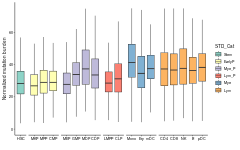

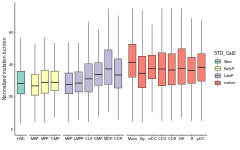

In [156]:
options(repr.plot.width=8,repr.plot.height=5,repr.plot.res=30)
ggplot(CheckVNumber.sensitive)+aes(STD.CellType,MutationBurden,fill=STD_Cat)+geom_boxplot(outlier.shape = NA)+ylim(0,75)+
    facet_grid(~STD_Cat,space = "free",scale="free")+theme_classic()+scale_fill_brewer(palette = "Set3")+
    theme(strip.text=element_blank(),axis.text = element_text(color="black"),)+labs(x="",y="Normalized mutation burden")  #+coord_flip()

ggplot(CheckVNumber.sensitive)+aes(STD.CellType,MutationBurden,fill=STD_Cat2)+geom_boxplot(outlier.shape = NA)+ylim(0,75)+
    facet_grid(~STD_Cat2,space = "free",scale="free")+theme_classic()+scale_fill_brewer(palette = "Set3")+theme(strip.text=element_blank())+
    theme(strip.text=element_blank(),axis.text = element_text(color="black"),)+labs(x="",y="Normalized mutation burden")     #+coord_flip()

In [154]:
wilcox.test(subset(CheckVNumber.sensitive,STD_Cat %in% c("Stem","EarlyP"))$MutationBurden,subset(CheckVNumber.sensitive,STD_Cat %in% c("Mye_P","Lym_P"))$MutationBurden)
wilcox.test(subset(CheckVNumber.sensitive,STD_Cat %in% c("Stem","EarlyP"))$MutationBurden,subset(CheckVNumber.sensitive,STD_Cat %in% c("Mye","Lym"))$MutationBurden)


	Wilcoxon rank sum test with continuity correction

data:  subset(CheckVNumber.sensitive, STD_Cat %in% c("Stem", "EarlyP"))$MutationBurden and subset(CheckVNumber.sensitive, STD_Cat %in% c("Mye_P", "Lym_P"))$MutationBurden
W = 37960455, p-value < 2.2e-16
alternative hypothesis: true location shift is not equal to 0



	Wilcoxon rank sum test with continuity correction

data:  subset(CheckVNumber.sensitive, STD_Cat %in% c("Stem", "EarlyP"))$MutationBurden and subset(CheckVNumber.sensitive, STD_Cat %in% c("Mye", "Lym"))$MutationBurden
W = 20324827, p-value < 2.2e-16
alternative hypothesis: true location shift is not equal to 0


In [ ]:
wilcox.test(subset(CheckVNumber.sensitive,Label=="HPC")$MutationBurden,subset(CheckVNumber.sensitive,Label=="BMMC")$MutationBurden)
wilcox.test(subset(CheckVNumber.sensitive,Label=="HSC")$MutationBurden,subset(CheckVNumber.sensitive,Label=="HPC")$MutationBurden)
wilcox.test(subset(CheckVNumber.sensitive,Label=="HSC")$MutationBurden,subset(CheckVNumber.sensitive,Label=="BMMC")$MutationBurden)

[1] 52.48364

# Clonal map

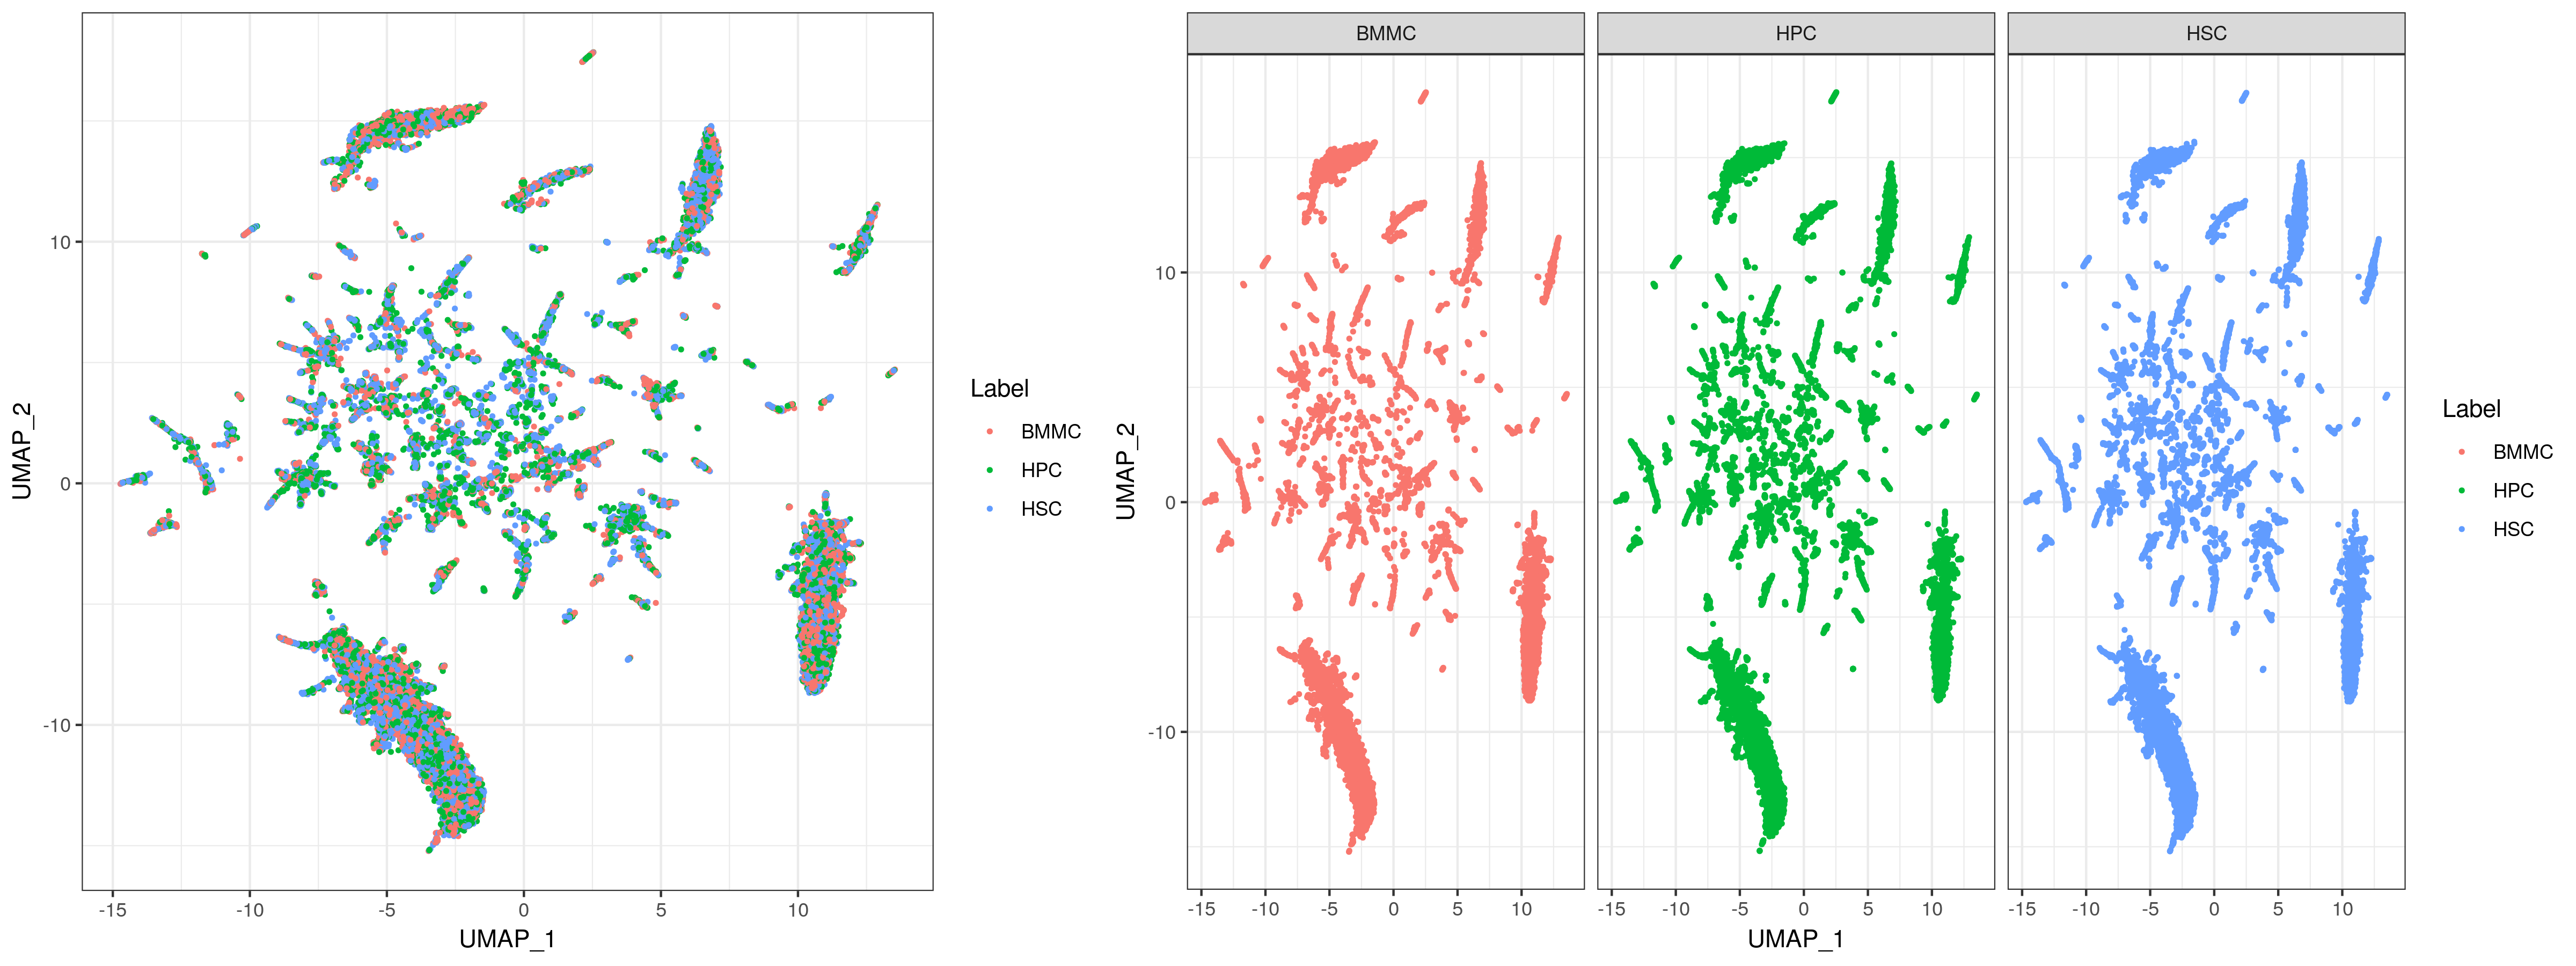

In [92]:
options(repr.plot.width=16, repr.plot.height=6)
p1<-HSC_HPC_BMMC_mitoTracing@DataToplotList@clustering %>% ggplot()+aes(UMAP_1,UMAP_2,color=Label)+geom_point(size=0.6)+theme_bw()
p2<-HSC_HPC_BMMC_mitoTracing@DataToplotList@clustering %>% ggplot()+aes(UMAP_1,UMAP_2,color=Label)+geom_point(size=0.6)+facet_grid(.~Label)+theme_bw()
grid.arrange(p1,p2,layout_matrix=t(matrix(c(1,1,1,2,2,2,2))))

# Quick tree

In [194]:
data(CellPCT)
V.weight<-data.frame(weight=1-CellPCT$muRate)
V.weight$Variants<-paste("Variants",gsub("_","",CellPCT$Variant),sep="")
head(V.weight)

weight    Variants      
1 0.2149264 Variants310TC 
2 0.7603385 Variants3109TC
3 0.9287734 Variants5764CT
4 0.9497623 Variants5765CA
5 0.9564624 Variants5766CG
6 0.9958641 Variants9979GA

In [195]:
BMMC_mitoTracing<-Create_mitoTracing(GTsummary_list=list(DN9_BMMC.VariantsGTSummary),
                depth_list=list(DN9_BMMC.depth),
                feature.list_list=list(DN9_BMMC.Variants.feature.lst),
                meta_list=list(Donor09_BMMC.meta),
                labels=c("BMMC"),thr="Sensitive")
BMMC_mitoTracing<-Make_matrix(BMMC_mitoTracing)
BMMC_mitoTracing<-SeuratLSIClustering(BMMC_mitoTracing,lsidim=2:50,rmvariants=c("Variants310TC","Variants3109TC","Variants5764CT"))
BMMC_mitoTracing<-AddDist(BMMC_mitoTracing,weightDF=V.weight,LSIdist=T,dim=2:50)
BMMC_mitoTracing<-AddDatatoplot_clustering(BMMC_mitoTracing)


Performing TF-IDF normalization

Running SVD

Scaling cell embeddings

23:04:39 UMAP embedding parameters a = 0.9922 b = 1.112

23:04:39 Read 7475 rows and found 49 numeric columns

23:04:39 Using Annoy for neighbor search, n_neighbors = 30

23:04:39 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

23:04:42 Writing NN index file to temp file /tmp/Rtmpa8VxRw/file1db46660f67

23:04:42 Searching Annoy index using 1 thread, search_k = 3000

23:04:45 Annoy recall = 100%

23:04:52 Commencing smooth kNN distance calibration using 1 thread

23:04:52 107 smooth knn distance failures

23:05:03 Initializing from normalized Laplacian + noise

23:05:03 Commencing optimization for 500 epochs, with 328540 positive edges

23:05:20 Optimization finished

Computing nearest neighbor graph

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 7475
Number of edges: 267609

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9580
Number of communities: 60
Elapsed time: 0 seconds
[1] "Weight vector matches well with the Cell-Variant matrix, continue..."
[1] "This function compute pairwise distance(row-row) for binary matrix, input sparse matrix(Each row is cell, each column is variant)"
[1] "Available method:"
[1] "Jaccard"     "Dice"        "3WJaccard"   "Simpson"     "Kulczynski2"
[6] "Ochiai"      "Hamming"    
[1] "This function compute pairwise distance(row-row) for binary matrix, input sparse matrix(Each row is cell, each column is variant)"
[1] "Available method:"
[1] "Jaccard"     "Dice"        "3WJaccard"   "Simpson"     "Kulczynski2"
[6] "Ochiai"      "Hamming"    
[1] "This function compute pairwise distance(row-row) for binary matrix, input sparse matrix(Each row is cell, each column is variant)"
[1] "Availa

In [196]:
BMMC_mitoTracing

        Threhold qualifiedCellCut       OnlyHetero           VAFcut 
     "Sensitive"             "10"           "TRUE"              "1" 
         Cellcut        maxctscut 
             "2"              "2" 
[1] "Total Cell number: 7756"

BMMC 
7756 
[1] "Total Variant number: 4087"
 [1] "Slot: GTsummary.filtered" "Slot: CellMeta"          
 [3] "Slot: V.fitered.list"     "Slot: UniqueV"           
 [5] "Slot: Cts.Mtx"            "Slot: Cts.Mtx.bi"        
 [7] "Slot: Ctx.Mtx.depth"      "Slot: para"              
 [9] "Slot: Seurat"             "Slot: DataToplotList"    
[11] "Slot: DistObjects"        "Slot: TREE"              

In [198]:
BMMC_mitoTracing.VS<-Create_mitoTracing(GTsummary_list=list(DN9_BMMC.VariantsGTSummary),
                depth_list=list(DN9_BMMC.depth),
                feature.list_list=list(DN9_BMMC.Variants.feature.lst),
                meta_list=list(Donor09_BMMC.meta),
                labels=c("BMMC"),thr="VerySensitive")
BMMC_mitoTracing.VS<-Make_matrix(BMMC_mitoTracing.VS)
BMMC_mitoTracing.VS<-SeuratLSIClustering(BMMC_mitoTracing.VS,lsidim=2:50,rmvariants=c("Variants310TC","Variants3109TC","Variants5764CT"))
BMMC_mitoTracing.VS<-AddDist(BMMC_mitoTracing.VS,weightDF=V.weight,LSIdist=T,dim=2:50)
BMMC_mitoTracing.VS<-AddDatatoplot_clustering(BMMC_mitoTracing.VS)


Performing TF-IDF normalization

Running SVD

Scaling cell embeddings

23:22:15 UMAP embedding parameters a = 0.9922 b = 1.112

23:22:15 Read 7668 rows and found 49 numeric columns

23:22:15 Using Annoy for neighbor search, n_neighbors = 30

23:22:15 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

23:22:19 Writing NN index file to temp file /tmp/Rtmpa8VxRw/file1db42d4a57ce

23:22:19 Searching Annoy index using 1 thread, search_k = 3000

23:22:22 Annoy recall = 100%

23:22:29 Commencing smooth kNN distance calibration using 1 thread

23:22:30 38 smooth knn distance failures

23:22:41 Initializing from normalized Laplacian + noise

23:22:41 Commencing optimization for 500 epochs, with 346620 positive edges

23:23:00 Optimization finished

Computing nearest neighbor graph

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 7668
Number of edges: 307463

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9574
Number of communities: 57
Elapsed time: 0 seconds
[1] "Weight vector matches well with the Cell-Variant matrix, continue..."
[1] "This function compute pairwise distance(row-row) for binary matrix, input sparse matrix(Each row is cell, each column is variant)"
[1] "Available method:"
[1] "Jaccard"     "Dice"        "3WJaccard"   "Simpson"     "Kulczynski2"
[6] "Ochiai"      "Hamming"    
[1] "This function compute pairwise distance(row-row) for binary matrix, input sparse matrix(Each row is cell, each column is variant)"
[1] "Available method:"
[1] "Jaccard"     "Dice"        "3WJaccard"   "Simpson"     "Kulczynski2"
[6] "Ochiai"      "Hamming"    
[1] "This function compute pairwise distance(row-row) for binary matrix, input sparse matrix(Each row is cell, each column is variant)"
[1] "Availa

In [199]:
BMMC_mitoTracing.VS

        Threhold qualifiedCellCut       OnlyHetero           VAFcut 
 "VerySensitive"             "10"           "TRUE"              "1" 
         Cellcut        maxctscut 
             "2"              "2" 
[1] "Total Cell number: 7756"

BMMC 
7756 
[1] "Total Variant number: 4660"
 [1] "Slot: GTsummary.filtered" "Slot: CellMeta"          
 [3] "Slot: V.fitered.list"     "Slot: UniqueV"           
 [5] "Slot: Cts.Mtx"            "Slot: Cts.Mtx.bi"        
 [7] "Slot: Ctx.Mtx.depth"      "Slot: para"              
 [9] "Slot: Seurat"             "Slot: DataToplotList"    
[11] "Slot: DistObjects"        "Slot: TREE"              

---

In [201]:
HPC_mitoTracing<-Create_mitoTracing(GTsummary_list=list(DN9_HPC.VariantsGTSummary),
                depth_list=list(DN9_HPC.depth),
                feature.list_list=list(DN9_HPC.Variants.feature.lst),
                meta_list=list(Donor09_HPC.meta),
                labels=c("HPC"),thr="Sensitive")
HPC_mitoTracing<-Make_matrix(HPC_mitoTracing)
HPC_mitoTracing<-SeuratLSIClustering(HPC_mitoTracing,lsidim=2:50,rmvariants=c("Variants310TC","Variants3109TC","Variants5764CT"))
HPC_mitoTracing<-AddDist(HPC_mitoTracing,weightDF=V.weight,LSIdist=T,dim=2:50)
HPC_mitoTracing<-AddDatatoplot_clustering(HPC_mitoTracing)


Performing TF-IDF normalization

Running SVD

Scaling cell embeddings

23:27:08 UMAP embedding parameters a = 0.9922 b = 1.112

23:27:08 Read 8702 rows and found 49 numeric columns

23:27:08 Using Annoy for neighbor search, n_neighbors = 30

23:27:08 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

23:27:11 Writing NN index file to temp file /tmp/Rtmpa8VxRw/file1db45f46f6d8

23:27:11 Searching Annoy index using 1 thread, search_k = 3000

23:27:14 Annoy recall = 100%

23:27:22 Commencing smooth kNN distance calibration using 1 thread

23:27:22 70 smooth knn distance failures

23:27:35 Initializing from normalized Laplacian + noise

23:27:35 Commencing optimization for 500 epochs, with 395260 positive edges

23:27:54 Optimization finished

Computing nearest neighbor graph

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 8702
Number of edges: 359774

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9597
Number of communities: 61
Elapsed time: 0 seconds
[1] "Weight vector matches well with the Cell-Variant matrix, continue..."
[1] "This function compute pairwise distance(row-row) for binary matrix, input sparse matrix(Each row is cell, each column is variant)"
[1] "Available method:"
[1] "Jaccard"     "Dice"        "3WJaccard"   "Simpson"     "Kulczynski2"
[6] "Ochiai"      "Hamming"    
[1] "This function compute pairwise distance(row-row) for binary matrix, input sparse matrix(Each row is cell, each column is variant)"
[1] "Available method:"
[1] "Jaccard"     "Dice"        "3WJaccard"   "Simpson"     "Kulczynski2"
[6] "Ochiai"      "Hamming"    
[1] "This function compute pairwise distance(row-row) for binary matrix, input sparse matrix(Each row is cell, each column is variant)"
[1] "Availa

In [202]:
HPC_mitoTracing

        Threhold qualifiedCellCut       OnlyHetero           VAFcut 
     "Sensitive"             "10"           "TRUE"              "1" 
         Cellcut        maxctscut 
             "2"              "2" 
[1] "Total Cell number: 8874"

 HPC 
8874 
[1] "Total Variant number: 5131"
 [1] "Slot: GTsummary.filtered" "Slot: CellMeta"          
 [3] "Slot: V.fitered.list"     "Slot: UniqueV"           
 [5] "Slot: Cts.Mtx"            "Slot: Cts.Mtx.bi"        
 [7] "Slot: Ctx.Mtx.depth"      "Slot: para"              
 [9] "Slot: Seurat"             "Slot: DataToplotList"    
[11] "Slot: DistObjects"        "Slot: TREE"              

In [204]:
HPC_mitoTracing.VS<-Create_mitoTracing(GTsummary_list=list(DN9_HPC.VariantsGTSummary),
                depth_list=list(DN9_HPC.depth),
                feature.list_list=list(DN9_HPC.Variants.feature.lst),
                meta_list=list(Donor09_HPC.meta),
                labels=c("HPC"),thr="VerySensitive")
HPC_mitoTracing.VS<-Make_matrix(HPC_mitoTracing.VS)
HPC_mitoTracing.VS<-SeuratLSIClustering(HPC_mitoTracing.VS,lsidim=2:50,rmvariants=c("Variants310TC","Variants3109TC","Variants5764CT"))
HPC_mitoTracing.VS<-AddDist(HPC_mitoTracing.VS,weightDF=V.weight,LSIdist=T,dim=2:50)
HPC_mitoTracing.VS<-AddDatatoplot_clustering(HPC_mitoTracing.VS)


Performing TF-IDF normalization

Running SVD

Scaling cell embeddings

23:33:44 UMAP embedding parameters a = 0.9922 b = 1.112

23:33:44 Read 8836 rows and found 49 numeric columns

23:33:44 Using Annoy for neighbor search, n_neighbors = 30

23:33:44 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

23:33:48 Writing NN index file to temp file /tmp/Rtmpa8VxRw/file1db444eddbc3

23:33:48 Searching Annoy index using 1 thread, search_k = 3000

23:33:51 Annoy recall = 100%

23:33:59 Commencing smooth kNN distance calibration using 1 thread

23:34:12 Initializing from normalized Laplacian + noise

23:34:12 Commencing optimization for 500 epochs, with 406512 positive edges

23:34:32 Optimization finished

Computing nearest neighbor graph

Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 8836
Number of edges: 393692

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9635
Number of communities: 58
Elapsed time: 0 seconds
[1] "Weight vector matches well with the Cell-Variant matrix, continue..."
[1] "This function compute pairwise distance(row-row) for binary matrix, input sparse matrix(Each row is cell, each column is variant)"
[1] "Available method:"
[1] "Jaccard"     "Dice"        "3WJaccard"   "Simpson"     "Kulczynski2"
[6] "Ochiai"      "Hamming"    
[1] "This function compute pairwise distance(row-row) for binary matrix, input sparse matrix(Each row is cell, each column is variant)"
[1] "Available method:"
[1] "Jaccard"     "Dice"        "3WJaccard"   "Simpson"     "Kulczynski2"
[6] "Ochiai"      "Hamming"    
[1] "This function compute pairwise distance(row-row) for binary matrix, input sparse matrix(Each row is cell, each column is variant)"
[1] "Availa

In [205]:
HPC_mitoTracing.VS

        Threhold qualifiedCellCut       OnlyHetero           VAFcut 
 "VerySensitive"             "10"           "TRUE"              "1" 
         Cellcut        maxctscut 
             "2"              "2" 
[1] "Total Cell number: 8874"

 HPC 
8874 
[1] "Total Variant number: 5725"
 [1] "Slot: GTsummary.filtered" "Slot: CellMeta"          
 [3] "Slot: V.fitered.list"     "Slot: UniqueV"           
 [5] "Slot: Cts.Mtx"            "Slot: Cts.Mtx.bi"        
 [7] "Slot: Ctx.Mtx.depth"      "Slot: para"              
 [9] "Slot: Seurat"             "Slot: DataToplotList"    
[11] "Slot: DistObjects"        "Slot: TREE"              

---

In [207]:
HSC_mitoTracing<-Create_mitoTracing(GTsummary_list=list(DN9_HSC.VariantsGTSummary),
                depth_list=list(DN9_HSC.depth),
                feature.list_list=list(DN9_HSC.Variants.feature.lst),
                meta_list=list(Donor09_HSC.meta),
                labels=c("HSC"),thr="Sensitive")
HSC_mitoTracing<-Make_matrix(HSC_mitoTracing)
HSC_mitoTracing<-SeuratLSIClustering(HSC_mitoTracing,lsidim=2:50,rmvariants=c("Variants310TC","Variants3109TC","Variants5764CT"))
HSC_mitoTracing<-AddDist(HSC_mitoTracing,weightDF=V.weight,LSIdist=T,dim=2:50)
HSC_mitoTracing<-AddDatatoplot_clustering(HSC_mitoTracing)


Performing TF-IDF normalization

Running SVD

Scaling cell embeddings

23:39:50 UMAP embedding parameters a = 0.9922 b = 1.112

23:39:50 Read 9948 rows and found 49 numeric columns

23:39:50 Using Annoy for neighbor search, n_neighbors = 30

23:39:50 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

23:39:54 Writing NN index file to temp file /tmp/Rtmpa8VxRw/file1db42f5ffa21

23:39:54 Searching Annoy index using 1 thread, search_k = 3000

23:39:57 Annoy recall = 100%

23:40:05 Commencing smooth kNN distance calibration using 1 thread

23:40:05 46 smooth knn distance failures

23:40:18 Initializing from normalized Laplacian + noise

23:40:18 Commencing optimization for 500 epochs, with 459828 positive edges

23:40:41 Optimization finished

Computing nearest neighbor graph

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 9948
Number of edges: 403836

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9590
Number of communities: 74
Elapsed time: 1 seconds
[1] "Weight vector matches well with the Cell-Variant matrix, continue..."
[1] "This function compute pairwise distance(row-row) for binary matrix, input sparse matrix(Each row is cell, each column is variant)"
[1] "Available method:"
[1] "Jaccard"     "Dice"        "3WJaccard"   "Simpson"     "Kulczynski2"
[6] "Ochiai"      "Hamming"    
[1] "This function compute pairwise distance(row-row) for binary matrix, input sparse matrix(Each row is cell, each column is variant)"
[1] "Available method:"
[1] "Jaccard"     "Dice"        "3WJaccard"   "Simpson"     "Kulczynski2"
[6] "Ochiai"      "Hamming"    
[1] "This function compute pairwise distance(row-row) for binary matrix, input sparse matrix(Each row is cell, each column is variant)"
[1] "Availa

In [208]:
HSC_mitoTracing

        Threhold qualifiedCellCut       OnlyHetero           VAFcut 
     "Sensitive"             "10"           "TRUE"              "1" 
         Cellcut        maxctscut 
             "2"              "2" 
[1] "Total Cell number: 10104"

  HSC 
10104 
[1] "Total Variant number: 5317"
 [1] "Slot: GTsummary.filtered" "Slot: CellMeta"          
 [3] "Slot: V.fitered.list"     "Slot: UniqueV"           
 [5] "Slot: Cts.Mtx"            "Slot: Cts.Mtx.bi"        
 [7] "Slot: Ctx.Mtx.depth"      "Slot: para"              
 [9] "Slot: Seurat"             "Slot: DataToplotList"    
[11] "Slot: DistObjects"        "Slot: TREE"              

In [210]:
HSC_mitoTracing.VS<-Create_mitoTracing(GTsummary_list=list(DN9_HSC.VariantsGTSummary),
                depth_list=list(DN9_HSC.depth),
                feature.list_list=list(DN9_HSC.Variants.feature.lst),
                meta_list=list(Donor09_HSC.meta),
                labels=c("HSC"),thr="VerySensitive")
HSC_mitoTracing.VS<-Make_matrix(HSC_mitoTracing.VS)
HSC_mitoTracing.VS<-SeuratLSIClustering(HSC_mitoTracing.VS,lsidim=2:50,rmvariants=c("Variants310TC","Variants3109TC","Variants5764CT"))
HSC_mitoTracing.VS<-AddDist(HSC_mitoTracing.VS,weightDF=V.weight,LSIdist=T,dim=2:50)
HSC_mitoTracing.VS<-AddDatatoplot_clustering(HSC_mitoTracing.VS)


Performing TF-IDF normalization

Running SVD

Scaling cell embeddings

23:44:26 UMAP embedding parameters a = 0.9922 b = 1.112

23:44:26 Read 10071 rows and found 49 numeric columns

23:44:26 Using Annoy for neighbor search, n_neighbors = 30

23:44:26 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

23:44:31 Writing NN index file to temp file /tmp/Rtmpa8VxRw/file1db45098ff5f

23:44:31 Searching Annoy index using 1 thread, search_k = 3000

23:44:36 Annoy recall = 100%

23:44:45 Commencing smooth kNN distance calibration using 1 thread

23:44:58 Initializing from normalized Laplacian + noise

23:44:59 Commencing optimization for 200 epochs, with 465780 positive edges

23:45:12 Optimization finished

Computing nearest neighbor graph

Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 10071
Number of edges: 454095

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9665
Number of communities: 62
Elapsed time: 1 seconds
[1] "Weight vector matches well with the Cell-Variant matrix, continue..."
[1] "This function compute pairwise distance(row-row) for binary matrix, input sparse matrix(Each row is cell, each column is variant)"
[1] "Available method:"
[1] "Jaccard"     "Dice"        "3WJaccard"   "Simpson"     "Kulczynski2"
[6] "Ochiai"      "Hamming"    
[1] "This function compute pairwise distance(row-row) for binary matrix, input sparse matrix(Each row is cell, each column is variant)"
[1] "Available method:"
[1] "Jaccard"     "Dice"        "3WJaccard"   "Simpson"     "Kulczynski2"
[6] "Ochiai"      "Hamming"    
[1] "This function compute pairwise distance(row-row) for binary matrix, input sparse matrix(Each row is cell, each column is variant)"
[1] "Avail

In [211]:
HSC_mitoTracing.VS

        Threhold qualifiedCellCut       OnlyHetero           VAFcut 
 "VerySensitive"             "10"           "TRUE"              "1" 
         Cellcut        maxctscut 
             "2"              "2" 
[1] "Total Cell number: 10104"

  HSC 
10104 
[1] "Total Variant number: 5943"
 [1] "Slot: GTsummary.filtered" "Slot: CellMeta"          
 [3] "Slot: V.fitered.list"     "Slot: UniqueV"           
 [5] "Slot: Cts.Mtx"            "Slot: Cts.Mtx.bi"        
 [7] "Slot: Ctx.Mtx.depth"      "Slot: para"              
 [9] "Slot: Seurat"             "Slot: DataToplotList"    
[11] "Slot: DistObjects"        "Slot: TREE"              

---

In [213]:
DN9_sep_BMMC_HPC_HSC_mitotracing_list<-list(BMMC_mitoTracing=BMMC_mitoTracing,
BMMC_mitoTracing.VS=BMMC_mitoTracing.VS,
HPC_mitoTracing=HPC_mitoTracing,
HPC_mitoTracing.VS=HPC_mitoTracing.VS,
HSC_mitoTracing=HSC_mitoTracing,
HSC_mitoTracing.VS=HSC_mitoTracing.VS)

In [215]:
#saveRDS(DN9_sep_BMMC_HPC_HSC_mitotracing_list,"/lab/solexa_weissman/cweng/Projects/MitoTracing_Velocity/SecondaryAnalysis/Donor4Donor9/RDS/DN9_sep_BMMC_HPC_HSC_mitotracing_list")
DN9_sep_BMMC_HPC_HSC_mitotracing_list<-readRDS("/lab/solexa_weissman/cweng/Projects/MitoTracing_Velocity/SecondaryAnalysis/Donor4Donor9/RDS/DN9_sep_BMMC_HPC_HSC_mitotracing_list")


In [216]:
DN9_BMMC_w_jaccard.njtree<-Make_tree(BMMC_mitoTracing,d = "w_jaccard",algorithm = "nj",onlyreturntree = T)
DN9_BMMC_w_cosine.njtree<-Make_tree(BMMC_mitoTracing,d = "w_cosine",algorithm = "nj",onlyreturntree = T)
DN9_BMMC.VS_w_jaccard.njtree<-Make_tree(BMMC_mitoTracing.VS,d = "w_jaccard",algorithm = "nj",onlyreturntree = T)
DN9_BMMC.VS_w_cosine.njtree<-Make_tree(BMMC_mitoTracing.VS,d = "w_cosine",algorithm = "nj",onlyreturntree = T)

In [221]:
DN9_BMMC_trees_list<-list(DN9_BMMC_w_jaccard.njtree=DN9_BMMC_w_jaccard.njtree,
                     DN9_BMMC_w_cosine.njtree=DN9_BMMC_w_cosine.njtree,
                     DN9_BMMC.VS_w_jaccard.njtree=DN9_BMMC.VS_w_jaccard.njtree,
                     DN9_BMMC.VS_w_cosine.njtree=DN9_BMMC.VS_w_cosine.njtree
)
saveRDS(DN9_BMMC_trees_list,"/lab/solexa_weissman/cweng/Projects/MitoTracing_Velocity/SecondaryAnalysis/Donor4Donor9/RDS/DN9_BMMC_trees_list")
DN9_BMMC_trees_list<-readRDS("/lab/solexa_weissman/cweng/Projects/MitoTracing_Velocity/SecondaryAnalysis/Donor4Donor9/RDS/DN9_BMMC_trees_list")

In [217]:
DN9_HPC_w_jaccard.njtree<-Make_tree(HPC_mitoTracing,d = "w_jaccard",algorithm = "nj",onlyreturntree = T)
DN9_HPC_w_cosine.njtree<-Make_tree(HPC_mitoTracing,d = "w_cosine",algorithm = "nj",onlyreturntree = T)
DN9_HPC.VS_w_jaccard.njtree<-Make_tree(HPC_mitoTracing.VS,d = "w_jaccard",algorithm = "nj",onlyreturntree = T)
DN9_HPC.VS_w_cosine.njtree<-Make_tree(HPC_mitoTracing.VS,d = "w_cosine",algorithm = "nj",onlyreturntree = T)

In [222]:
DN9_HPC_trees_list<-list(DN9_HPC_w_jaccard.njtree=DN9_HPC_w_jaccard.njtree,
                     DN9_HPC_w_cosine.njtree=DN9_HPC_w_cosine.njtree,
                     DN9_HPC.VS_w_jaccard.njtree=DN9_HPC.VS_w_jaccard.njtree,
                     DN9_HPC.VS_w_cosine.njtree=DN9_HPC.VS_w_cosine.njtree
)
saveRDS(DN9_HPC_trees_list,"/lab/solexa_weissman/cweng/Projects/MitoTracing_Velocity/SecondaryAnalysis/Donor4Donor9/RDS/DN9_HPC_trees_list")
DN9_HPC_trees_list<-readRDS("/lab/solexa_weissman/cweng/Projects/MitoTracing_Velocity/SecondaryAnalysis/Donor4Donor9/RDS/DN9_HPC_trees_list")

In [218]:
DN9_HSC_w_jaccard.njtree<-Make_tree(HSC_mitoTracing,d = "w_jaccard",algorithm = "nj",onlyreturntree = T)
DN9_HSC_w_cosine.njtree<-Make_tree(HSC_mitoTracing,d = "w_cosine",algorithm = "nj",onlyreturntree = T)
DN9_HSC.VS_w_jaccard.njtree<-Make_tree(HSC_mitoTracing.VS,d = "w_jaccard",algorithm = "nj",onlyreturntree = T)
DN9_HSC.VS_w_cosine.njtree<-Make_tree(HSC_mitoTracing.VS,d = "w_cosine",algorithm = "nj",onlyreturntree = T)

In [223]:
DN9_HSC_trees_list<-list(DN9_HSC_w_jaccard.njtree=DN9_HSC_w_jaccard.njtree,
                     DN9_HSC_w_cosine.njtree=DN9_HSC_w_cosine.njtree,
                     DN9_HSC.VS_w_jaccard.njtree=DN9_HSC.VS_w_jaccard.njtree,
                     DN9_HSC.VS_w_cosine.njtree=DN9_HSC.VS_w_cosine.njtree
)
saveRDS(DN9_HSC_trees_list,"/lab/solexa_weissman/cweng/Projects/MitoTracing_Velocity/SecondaryAnalysis/Donor4Donor9/RDS/DN9_HSC_trees_list")
DN9_HSC_trees_list<-readRDS("/lab/solexa_weissman/cweng/Projects/MitoTracing_Velocity/SecondaryAnalysis/Donor4Donor9/RDS/DN9_HSC_trees_list")

# View tree

In [224]:
p1<-ggtree(DN9_BMMC_trees_list$DN9_BMMC_w_jaccard.njtree@treedata, layout="circular",branch.length='none') 
p2<-ggtree(DN9_BMMC_trees_list$DN9_BMMC_w_cosine.njtree@treedata, layout="circular",branch.length='none') 
p3<-ggtree(DN9_BMMC_trees_list$DN9_BMMC.VS_w_jaccard.njtree@treedata, layout="circular",branch.length='none') 
p4<-ggtree(DN9_BMMC_trees_list$DN9_BMMC.VS_w_cosine.njtree@treedata, layout="circular",branch.length='none') 

p5<-ggtree(DN9_HPC_trees_list$DN9_HPC_w_jaccard.njtree@treedata, layout="circular",branch.length='none') 
p6<-ggtree(DN9_HPC_trees_list$DN9_HPC_w_cosine.njtree@treedata, layout="circular",branch.length='none') 
p7<-ggtree(DN9_HPC_trees_list$DN9_HPC.VS_w_jaccard.njtree@treedata, layout="circular",branch.length='none') 
p8<-ggtree(DN9_HPC_trees_list$DN9_HPC.VS_w_cosine.njtree@treedata, layout="circular",branch.length='none') 

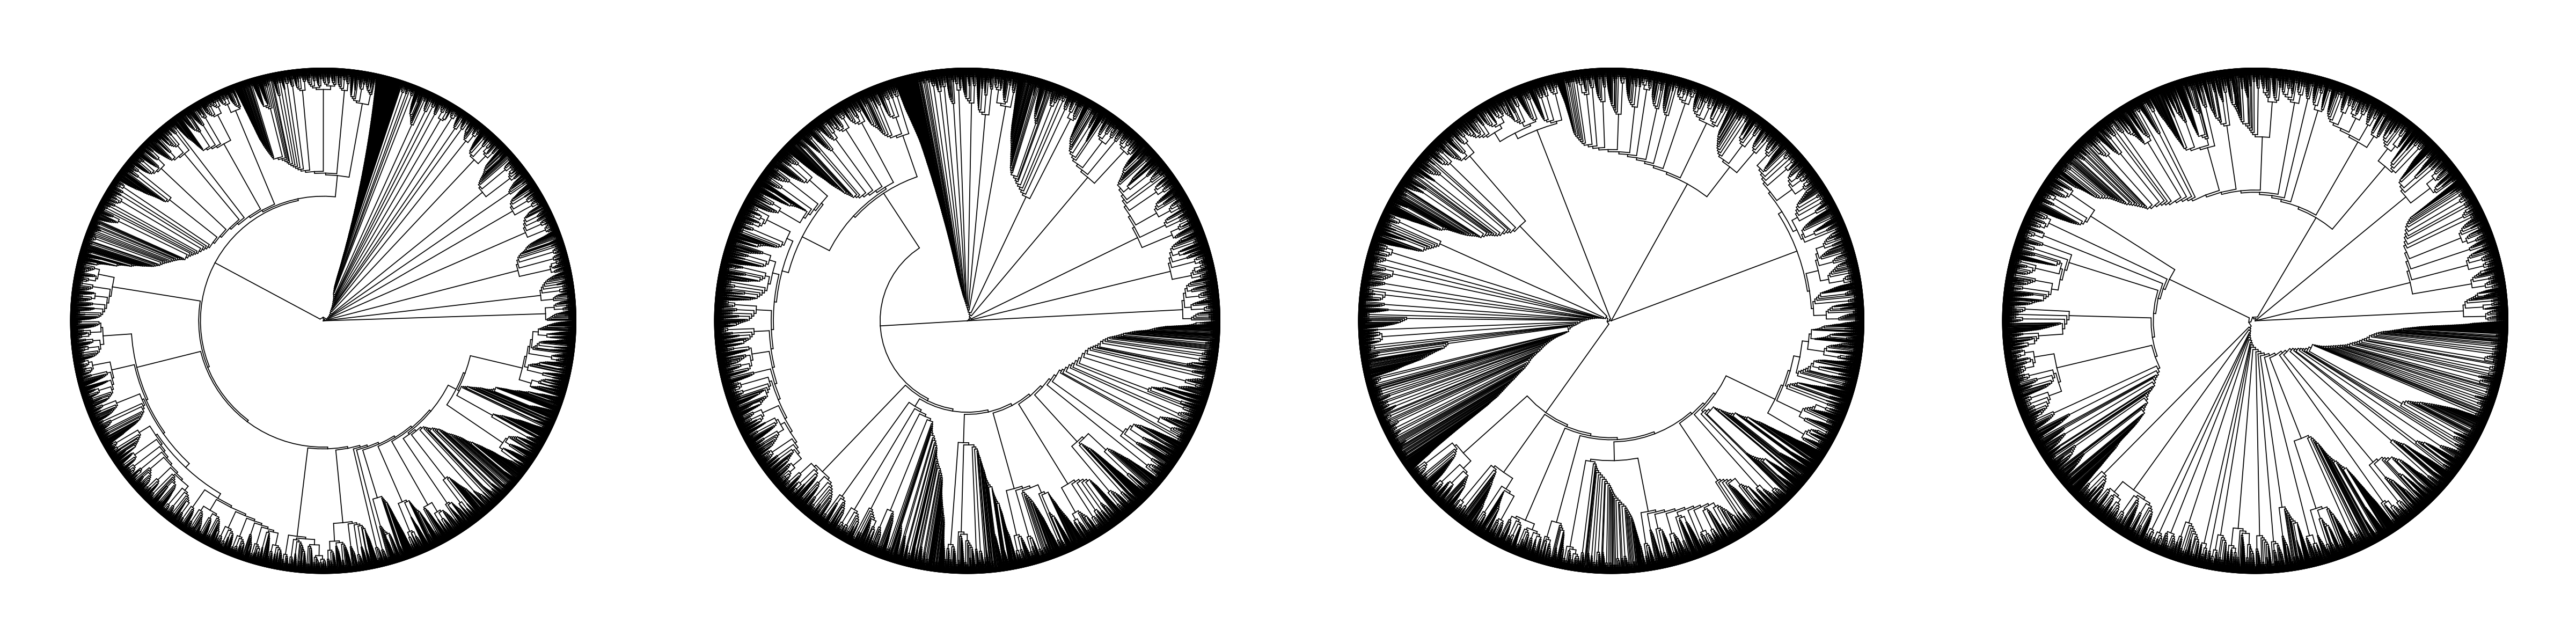

In [225]:
options(repr.plot.width=40,repr.plot.height=10,repr.plot.res=120)
grid.arrange(p1,p2,p3,p4,nrow=1)

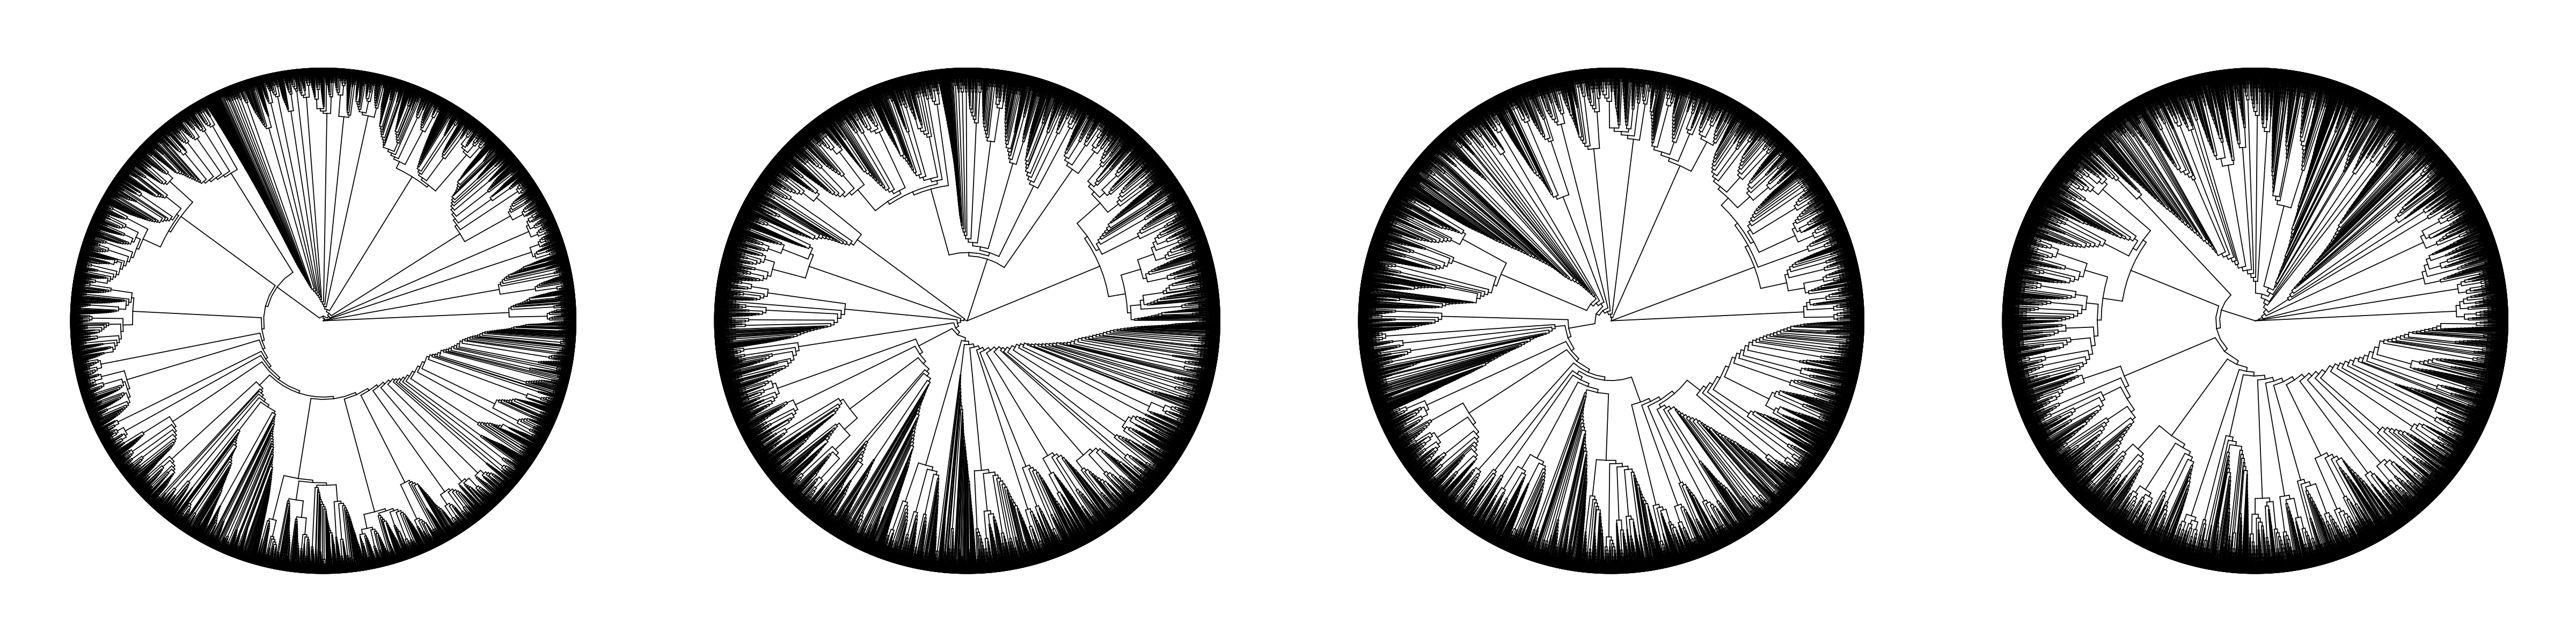

In [226]:
options(repr.plot.width=40,repr.plot.height=10,repr.plot.res=120)
grid.arrange(p5,p6,p7,p8,nrow=1)

# Lineage analysis- Old method

In [188]:
BMMC_mitoTracing

        Threhold qualifiedCellCut       OnlyHetero           VAFcut 
 "VerySensitive"             "10"           "TRUE"              "1" 
         Cellcut        maxctscut 
             "2"              "2" 
[1] "Total Cell number: 7756"

BMMC 
7756 
[1] "Total Variant number: 4660"
 [1] "Slot: GTsummary.filtered" "Slot: CellMeta"          
 [3] "Slot: V.fitered.list"     "Slot: UniqueV"           
 [5] "Slot: Cts.Mtx"            "Slot: Cts.Mtx.bi"        
 [7] "Slot: Ctx.Mtx.depth"      "Slot: para"              
 [9] "Slot: Seurat"             "Slot: DataToplotList"    
[11] "Slot: DistObjects"        "Slot: TREE"              

In [187]:
BMMC_mitoTracing<-Create_mitoTracing(GTsummary_list=list(DN9_BMMC.VariantsGTSummary),
                depth_list=list(DN9_BMMC.depth),
                feature.list_list=list(DN9_BMMC.Variants.feature.lst),
                meta_list=list(Donor09_BMMC.meta),
                labels=c("BMMC"))



In [96]:
BMMC_mitoTracing<-Make_matrix(BMMC_mitoTracing)
BMMC_mitoTracing<-SeuratLSIClustering(BMMC_mitoTracing)
BMMC_mitoTracing<-AddDatatoplot_clustering(BMMC_mitoTracing)

Performing TF-IDF normalization

Running SVD

Scaling cell embeddings

07:22:10 UMAP embedding parameters a = 0.9922 b = 1.112

07:22:10 Read 7707 rows and found 20 numeric columns

07:22:10 Using Annoy for neighbor search, n_neighbors = 30

07:22:10 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

07:22:14 Writing NN index file to temp file /tmp/RtmpeEgmfU/file4ca2106aa4d7

07:22:14 Searching Annoy index using 1 thread, search_k = 3000

07:22:18 Annoy recall = 100%

07:22:23 Commencing smooth kNN distance calibration using 1 thread

07:22:23 51 smooth knn distance failures

07:22:29 Initializing from normalized Laplacian + noise

07:22:30 Commencing optimization for 500 epochs, with 338406 positive edges

07:22:42 Optimization finished

Computing nearest neighbor graph

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 7707
Number of edges: 243538

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9716
Number of communities: 37
Elapsed time: 0 seconds


In [98]:
BMMC_mitoTracing<-AddDist(BMMC_mitoTracing)

[1] "This function compute pairwise distance(row-row) for binary matrix, input sparse matrix(Each row is cell, each column is variant)"
[1] "Available method:"
[1] "Jaccard"     "Dice"        "3WJaccard"   "Simpson"     "Kulczynski2"
[6] "Ochiai"      "Hamming"    
[1] "This function compute pairwise distance(row-row) for binary matrix, input sparse matrix(Each row is cell, each column is variant)"
[1] "Available method:"
[1] "Jaccard"     "Dice"        "3WJaccard"   "Simpson"     "Kulczynski2"
[6] "Ochiai"      "Hamming"    
[1] "This function compute pairwise distance(row-row) for binary matrix, input sparse matrix(Each row is cell, each column is variant)"
[1] "Available method:"
[1] "Jaccard"     "Dice"        "3WJaccard"   "Simpson"     "Kulczynski2"
[6] "Ochiai"      "Hamming"    


In [99]:
CellTypeInk<-function(x,k,CellTypeDistri){
NearByCell<-x[order(x)] %>% .[2:k] %>% names()
CellTypeT<-subset(CellTypeDistri,Cell %in% NearByCell) 
Ratio<-table(CellTypeT$CellType)/nrow(CellTypeT)
return(Ratio)
}

In [100]:
DistMatrix<-as.matrix(BMMC_mitoTracing@DistObjects@jaccard)

In [101]:
NearByCellType.k10<-apply(DistMatrix,1,CellTypeInk,k=11,CellTypeDistri=BMMC_mitoTracing@CellMeta)
NearByCellType.k20<-apply(DistMatrix,1,CellTypeInk,k=21,CellTypeDistri=BMMC_mitoTracing@CellMeta)
NearByCellType.k50<-apply(DistMatrix,1,CellTypeInk,k=51,CellTypeDistri=BMMC_mitoTracing@CellMeta)

In [102]:
X<-BMMC_mitoTracing@CellMeta[,"CellType",drop=F]
NearByCellType.k50.meta<-t(NearByCellType.k50) %>% Tomerge_v2(.,X) #%>% subset(.,CellType!="pDC")
NearByCellType.k20.meta<-t(NearByCellType.k20) %>% Tomerge_v2(.,X) #%>% subset(.,CellType!="pDC")
NearByCellType.k10.meta<-t(NearByCellType.k10) %>% Tomerge_v2(.,X) #%>% subset(.,CellType!="pDC")

In [107]:
NearByCellType.k50.meta.summary<-NearByCellType.k50.meta %>% group_by(CellType) %>% dplyr::summarise(CD4=mean(CD4),CD8=mean(CD8),B=mean(B),NK=mean(NK),mDC=mean(mDC),pDC=mean(pDC),Meg=mean(Meg),Ery=mean(Ery),Mono=mean(Mono))
NearByCellType.k20.meta.summary<-NearByCellType.k20.meta %>% group_by(CellType) %>% dplyr::summarise(CD4=mean(CD4),CD8=mean(CD8),B=mean(B),NK=mean(NK),mDC=mean(mDC),pDC=mean(pDC),Meg=mean(Meg),Ery=mean(Ery),Mono=mean(Mono))
NearByCellType.k10.meta.summary<-NearByCellType.k10.meta %>% group_by(CellType) %>% dplyr::summarise(CD4=mean(CD4),CD8=mean(CD8),B=mean(B),NK=mean(NK),mDC=mean(mDC),pDC=mean(pDC),Meg=mean(Meg),Ery=mean(Ery),Mono=mean(Mono))

In [108]:
head(NearByCellType.k50.meta)

pDC2 pDC  Meg  Ery  mDC  Mono B    NK   CD8  CD4  CellType
AAACAAGCAAACCTAG_1 0.02 0.00 0.00 0.14 0.00 0.08 0.10 0.12 0.22 0.32 CD4     
AAACAAGCAACCAAAT_1 0.00 0.00 0.02 0.12 0.00 0.16 0.04 0.14 0.30 0.22 B       
AAACAAGCAAGGATTT_1 0.00 0.00 0.02 0.12 0.00 0.14 0.08 0.10 0.20 0.34 NK      
AAACAAGCACCGTTCA_1 0.00 0.02 0.00 0.08 0.00 0.20 0.02 0.12 0.28 0.28 CD8     
AAACCAGGTCATGGTT_1 0.00 0.00 0.06 0.08 0.02 0.08 0.20 0.10 0.20 0.26 B       
AAACCGCCAAACCCAA_1 0.02 0.02 0.00 0.10 0.00 0.14 0.12 0.08 0.18 0.34 mDC

In [115]:
NearByCellType.k10.meta.summary[1:10,2:ncol(NearByCellType.k10.meta.summary)] %>% apply(.,2,scale) %>% 
cbind(.,CellType=as.character(NearByCellType.k10.meta.summary$CellType[1:10])) %>%
as.data.frame %>% melt(.,id.vars = "CellType") %>% mutate(value=as.numeric(value)) -> datatoplot.k10

NearByCellType.k20.meta.summary[1:10,2:ncol(NearByCellType.k20.meta.summary)] %>% apply(.,2,scale) %>% 
cbind(.,CellType=as.character(NearByCellType.k20.meta.summary$CellType[1:10])) %>%
as.data.frame %>% melt(.,id.vars = "CellType") %>% mutate(value=as.numeric(value)) -> datatoplot.k20

NearByCellType.k50.meta.summary[1:10,2:ncol(NearByCellType.k50.meta.summary)] %>% apply(.,2,scale) %>% 
cbind(.,CellType=as.character(NearByCellType.k50.meta.summary$CellType[1:10])) %>%
as.data.frame %>% melt(.,id.vars = "CellType") %>% mutate(value=as.numeric(value)) -> datatoplot.k50

In [116]:
NearByCellType.k10.meta.summary

CellType CD4       CD8       B         NK         mDC         pDC        
1  pDC2     0.2916667 0.2416667 0.1291667 0.08194444 0.005555556 0.001388889
2  pDC      0.3200000 0.2500000 0.1150000 0.07000000 0.010000000 0.000000000
3  Meg      0.2654135 0.2221805 0.1496241 0.05864662 0.007518797 0.002255639
4  Ery      0.2925150 0.2395210 0.1240519 0.08293413 0.005089820 0.002195609
5  mDC      0.2903846 0.2269231 0.1326923 0.08461538 0.005769231 0.005769231
6  Mono     0.3048571 0.2421905 0.1125714 0.08742857 0.004666667 0.002571429
7  B        0.2931927 0.2405561 0.1171620 0.08523490 0.005081496 0.001725791
8  NK       0.3025000 0.2496429 0.1046429 0.08625000 0.003750000 0.002321429
9  CD8      0.3037332 0.2492656 0.1045900 0.09326805 0.003733170 0.002019584
10 CD4      0.3034363 0.2447211 0.1035359 0.09770916 0.003735060 0.001344622
   Meg         Ery        Mono     
1  0.012500000 0.08611111 0.1277778
2  0.010000000 0.12000000 0.1050000
3  0.028571429 0.10563910 0.1443609
4  0.013572854 0.11427146 0.1148703
5  0.007692308 0.10192308 0.1365385
6  0.010380952 0.10333333 0.1218095
7  0.012751678 0.10949185 0.1220518
8  0.009464286 0.12250000 0.1091071
9  0.008629131 0.11242350 0.1116891
10 0.007768924 0.11827689 0.1103586

In [117]:
datatoplot.k10$variable<-factor(datatoplot.k10$variable,levels=c("CD4","CD8","NK","B","pDC","mDC","Mono","Ery","Meg"))
datatoplot.k10$CellType<-factor(datatoplot.k10$CellType,levels=c("CD4","CD8","NK","B","pDC","mDC","Mono","Ery","Meg"))
datatoplot.k20$variable<-factor(datatoplot.k20$variable,levels=c("CD4","CD8","NK","B","pDC","mDC","Mono","Ery","Meg"))
datatoplot.k20$CellType<-factor(datatoplot.k20$CellType,levels=c("CD4","CD8","NK","B","pDC","mDC","Mono","Ery","Meg"))
datatoplot.k50$variable<-factor(datatoplot.k50$variable,levels=c("CD4","CD8","NK","B","pDC","mDC","Mono","Ery","Meg"))
datatoplot.k50$CellType<-factor(datatoplot.k50$CellType,levels=c("CD4","CD8","NK","B","pDC","mDC","Mono","Ery","Meg"))

In [118]:
datatoplot.k10<-datatoplot.k10[complete.cases(datatoplot.k10),] 
datatoplot.k20<-datatoplot.k20[complete.cases(datatoplot.k20),] 
datatoplot.k50<-datatoplot.k50[complete.cases(datatoplot.k50),] 

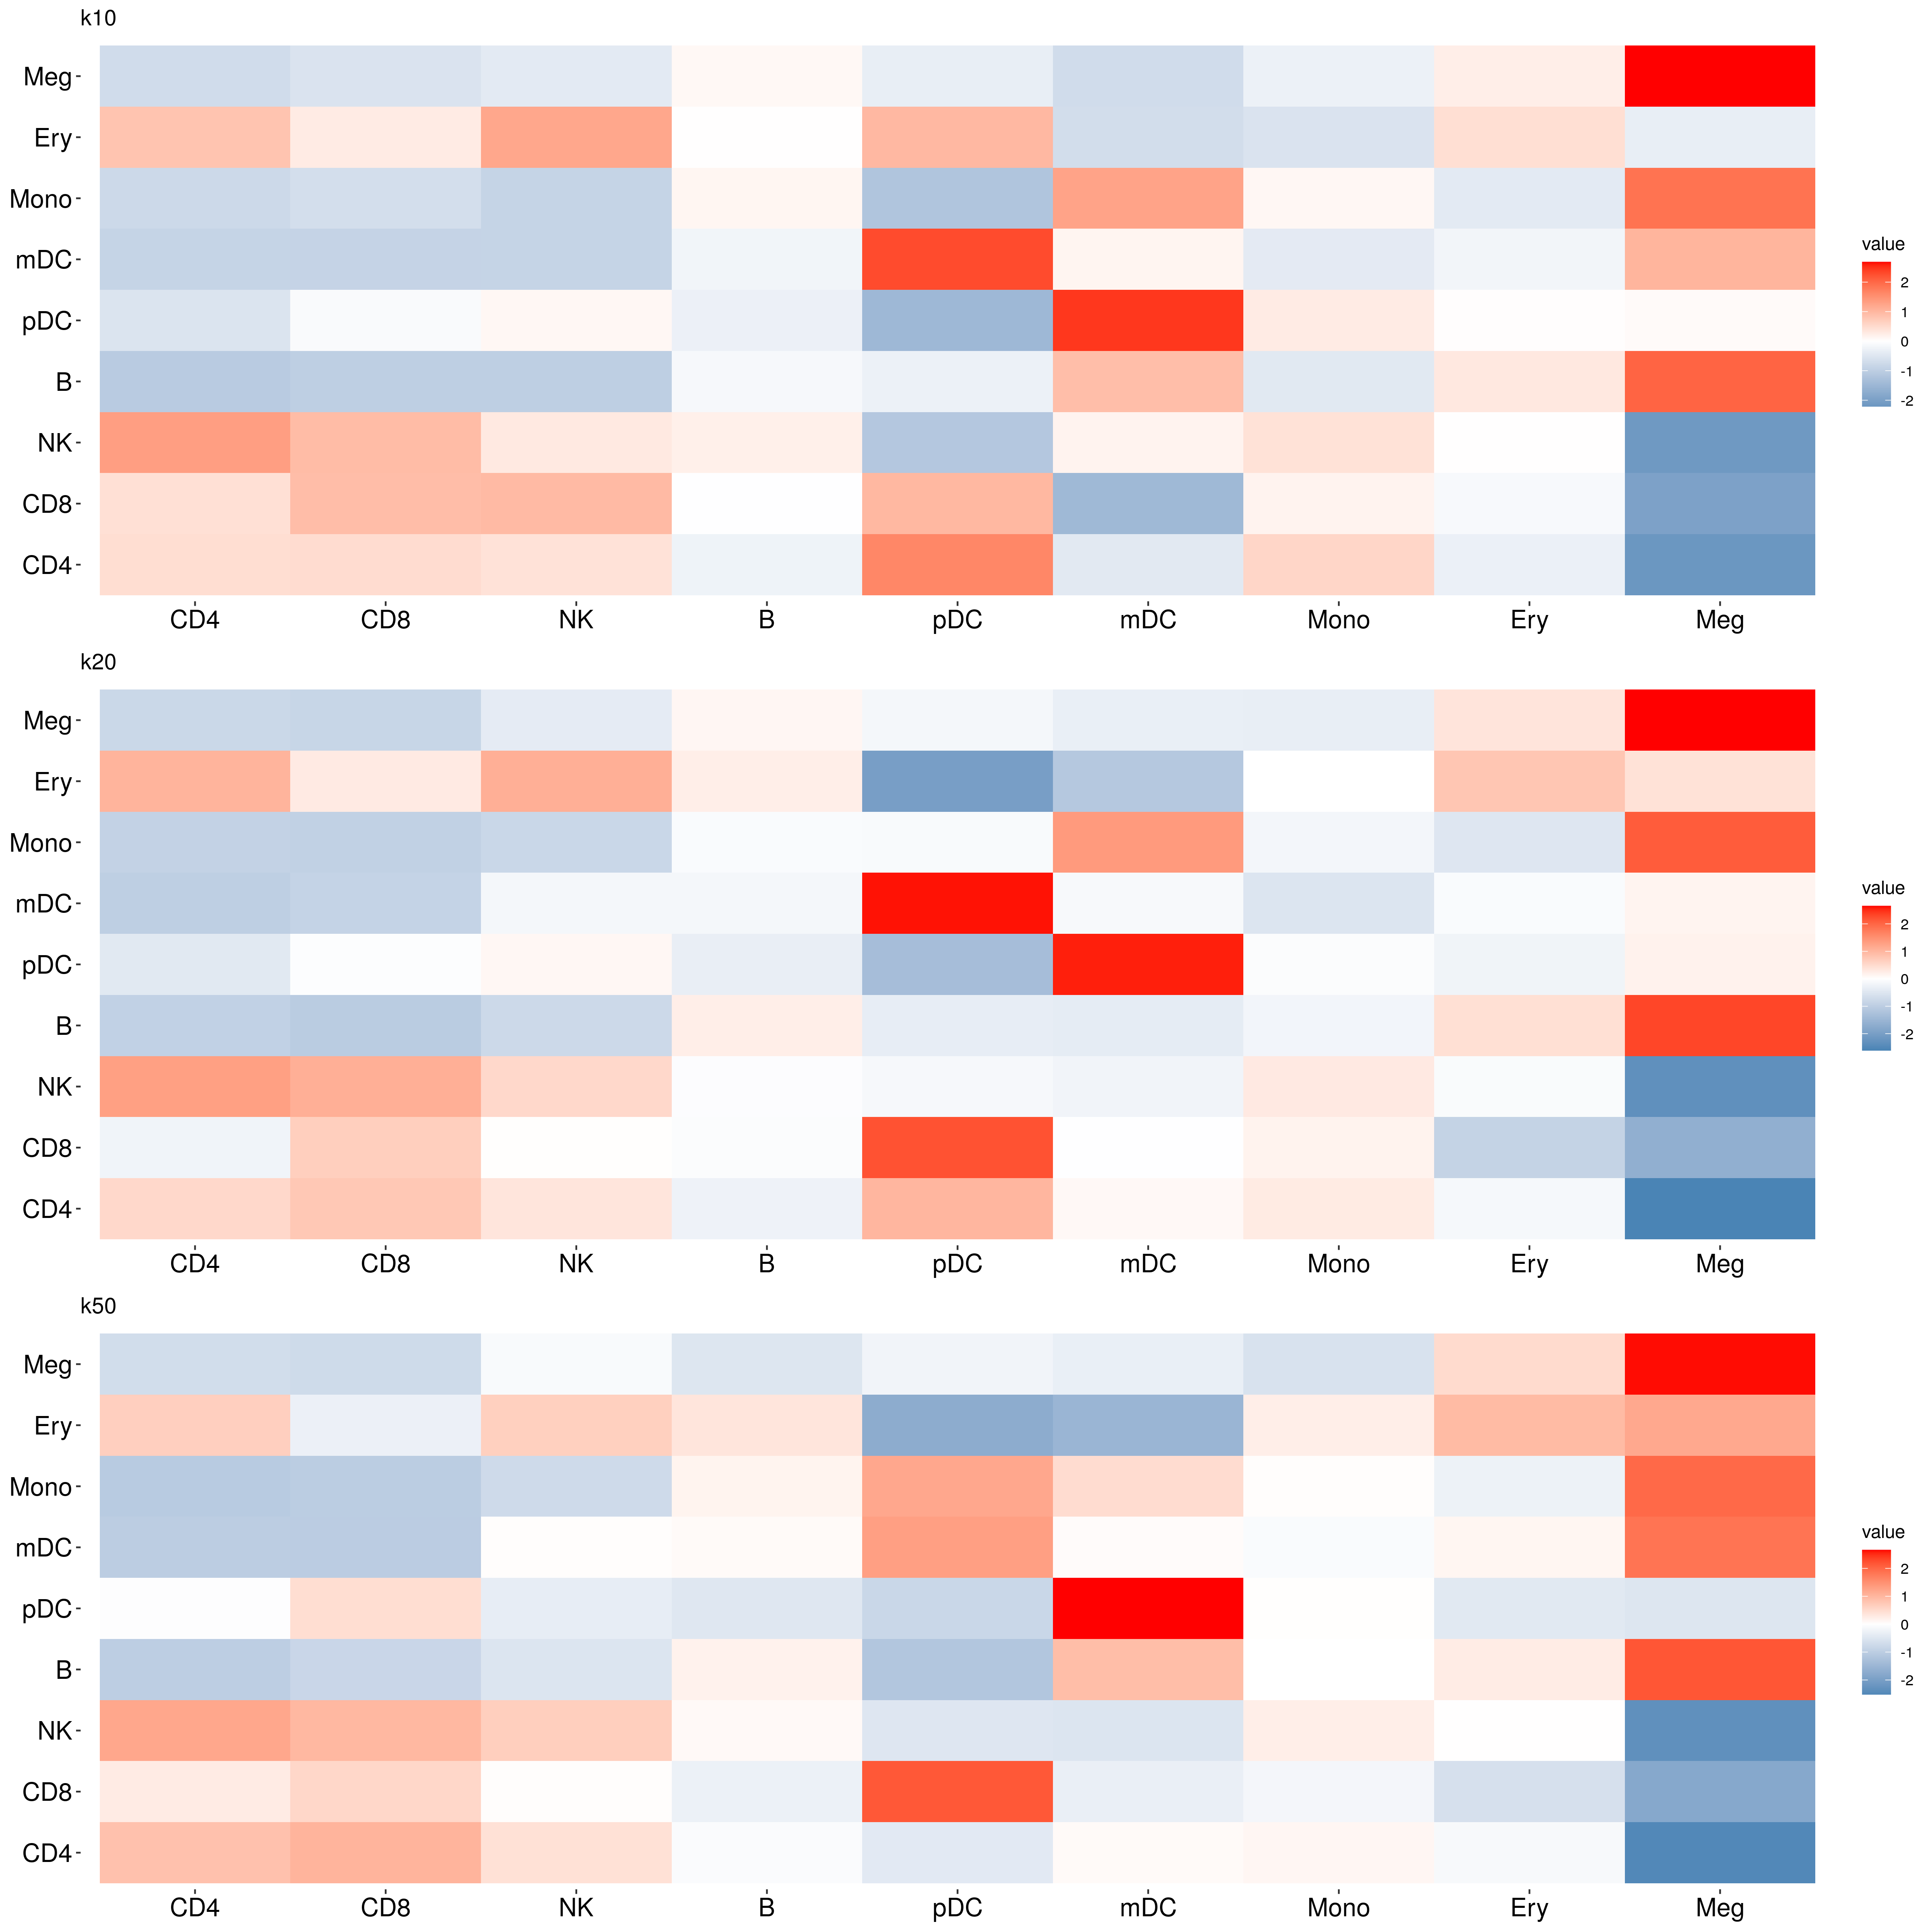

In [124]:
p1<-ggplot(datatoplot.k10)+aes(CellType,variable,fill=value)+geom_tile()+scale_fill_gradient2(low="steelblue",mid="white",high="red")+theme(panel.background = element_blank(),axis.text=element_text(size=15,color="black"),axis.title=element_blank())+ggtitle("k10")
p2<-ggplot(datatoplot.k20)+aes(CellType,variable,fill=value)+geom_tile()+scale_fill_gradient2(low="steelblue",mid="white",high="red")+theme(panel.background = element_blank(),axis.text=element_text(size=15,color="black"),axis.title=element_blank())+ggtitle("k20")
p3<-ggplot(datatoplot.k50)+aes(CellType,variable,fill=value)+geom_tile()+scale_fill_gradient2(low="steelblue",mid="white",high="red")+theme(panel.background = element_blank(),axis.text=element_text(size=15,color="black"),axis.title=element_blank())+ggtitle("k50")
options(repr.plot.width=16, repr.plot.height=16)
grid.arrange(p1,p2,p3)

# Random Explore

In [15]:
DN9_BMMC_Consensus.raw<-read.table("/lab/solexa_weissman/cweng/Projects/MitoTracing_Velocity/SecondaryAnalysis/Donor4Donor9/Donor9/DN9_BMMC/MTenrichCombine/mitoV/final/RawGenotypes.Total.StrandBalance")
DN9_HPC_Consensus.raw<-read.table("/lab/solexa_weissman/cweng/Projects/MitoTracing_Velocity/SecondaryAnalysis/Donor4Donor9/Donor9/DN9_HPC/MTenrichCombine/mitoV/final/RawGenotypes.Total.StrandBalance")
DN9_HSC_Consensus.raw<-read.table("/lab/solexa_weissman/cweng/Projects/MitoTracing_Velocity/SecondaryAnalysis/Donor4Donor9/Donor9/DN9_HSC/MTenrichCombine/mitoV/final/RawGenotypes.Total.StrandBalance")

In [16]:
colnames(DN9_BMMC_Consensus.raw)<-c("ID","Cell","Pos","Call","Alt","Ref","FamSize","GT_cts","CSS","DB_cts","SG_cts","Strand0","Strand1","TotalQualifyCTS")
colnames(DN9_HPC_Consensus.raw)<-c("ID","Cell","Pos","Call","Alt","Ref","FamSize","GT_cts","CSS","DB_cts","SG_cts","Strand0","Strand1","TotalQualifyCTS")
colnames(DN9_HSC_Consensus.raw)<-c("ID","Cell","Pos","Call","Alt","Ref","FamSize","GT_cts","CSS","DB_cts","SG_cts","Strand0","Strand1","TotalQualifyCTS")

In [19]:
options(repr.plot.width=3.5,repr.plot.height=3,repr.plot.res=300)

Warning message:
“Removed 3582 rows containing non-finite values (stat_bin).”
Warning message:
“Removed 2 rows containing missing values (geom_bar).”


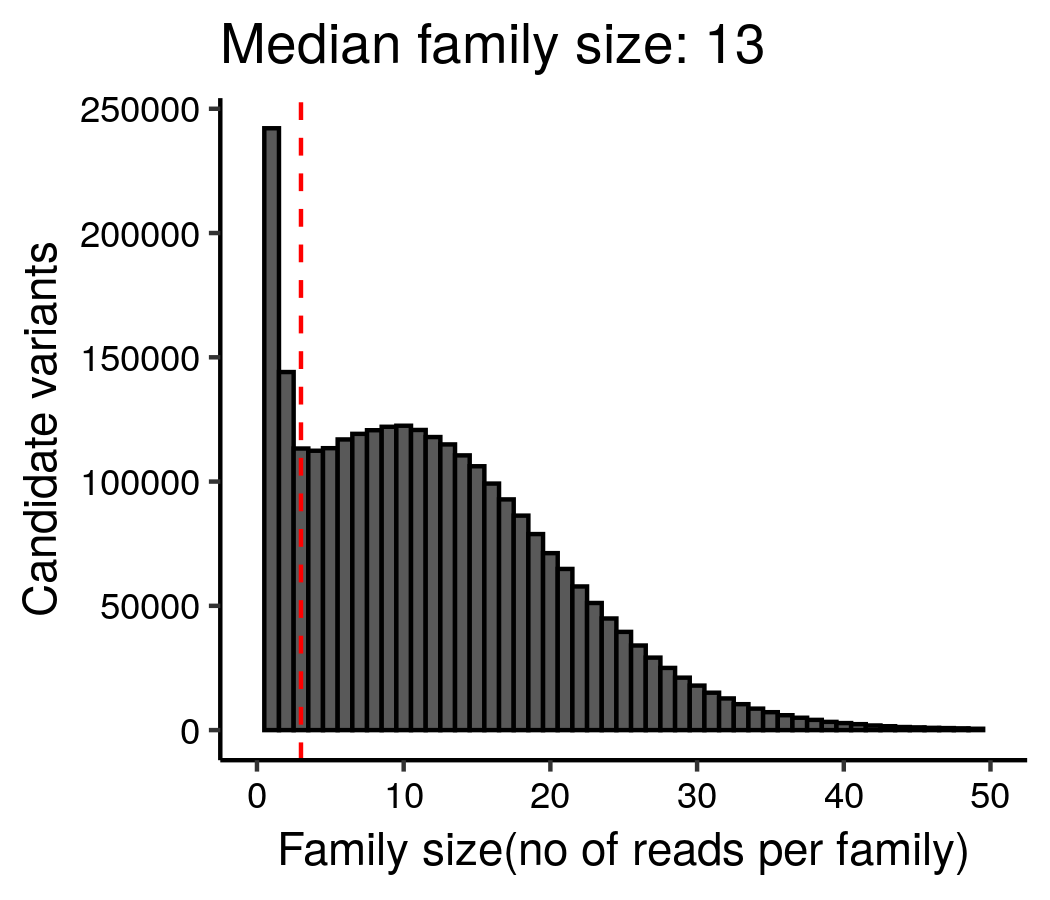

In [20]:
m<-median(subset(DN9_BMMC_Consensus.raw,FamSize>=3)$FamSize)
ggplot(DN9_BMMC_Consensus.raw)+aes(FamSize)+geom_histogram(binwidth=1,color="black")+xlim(0,50)+theme_classic()+geom_vline(xintercept=3,linetype=2,color="red")+
    labs(x="Family size(no of reads per family)",y="Candidate variants")+theme(axis.text = element_text(color="black"))+ggtitle(paste("Median family size:",m))

Warning message:
“Removed 1290 rows containing non-finite values (stat_bin).”
Warning message:
“Removed 2 rows containing missing values (geom_bar).”


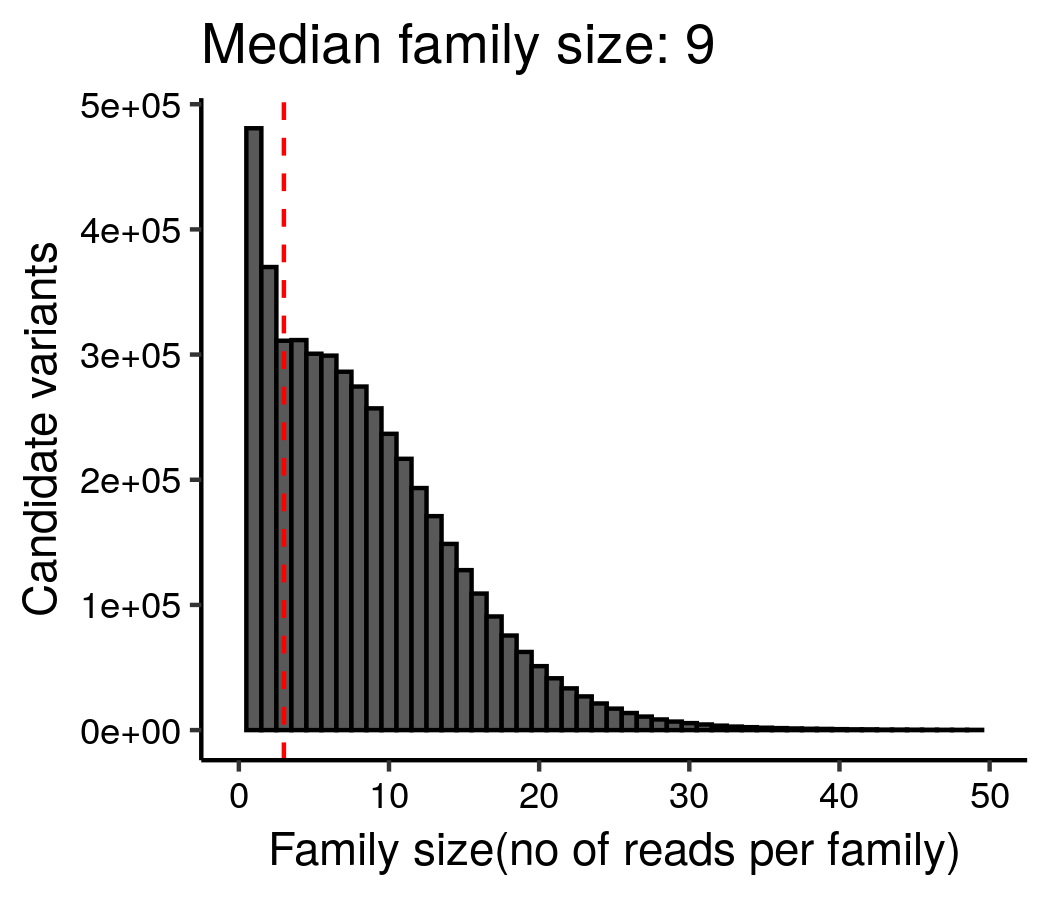

In [23]:
m<-median(subset(DN9_HPC_Consensus.raw,FamSize>=3)$FamSize)
ggplot(DN9_HPC_Consensus.raw)+aes(FamSize)+geom_histogram(binwidth=1,color="black")+xlim(0,50)+theme_classic()+geom_vline(xintercept=3,linetype=2,color="red")+
    labs(x="Family size(no of reads per family)",y="Candidate variants")+theme(axis.text = element_text(color="black"))+ggtitle(paste("Median family size:",m))

Warning message:
“Removed 200 rows containing non-finite values (stat_bin).”
Warning message:
“Removed 2 rows containing missing values (geom_bar).”


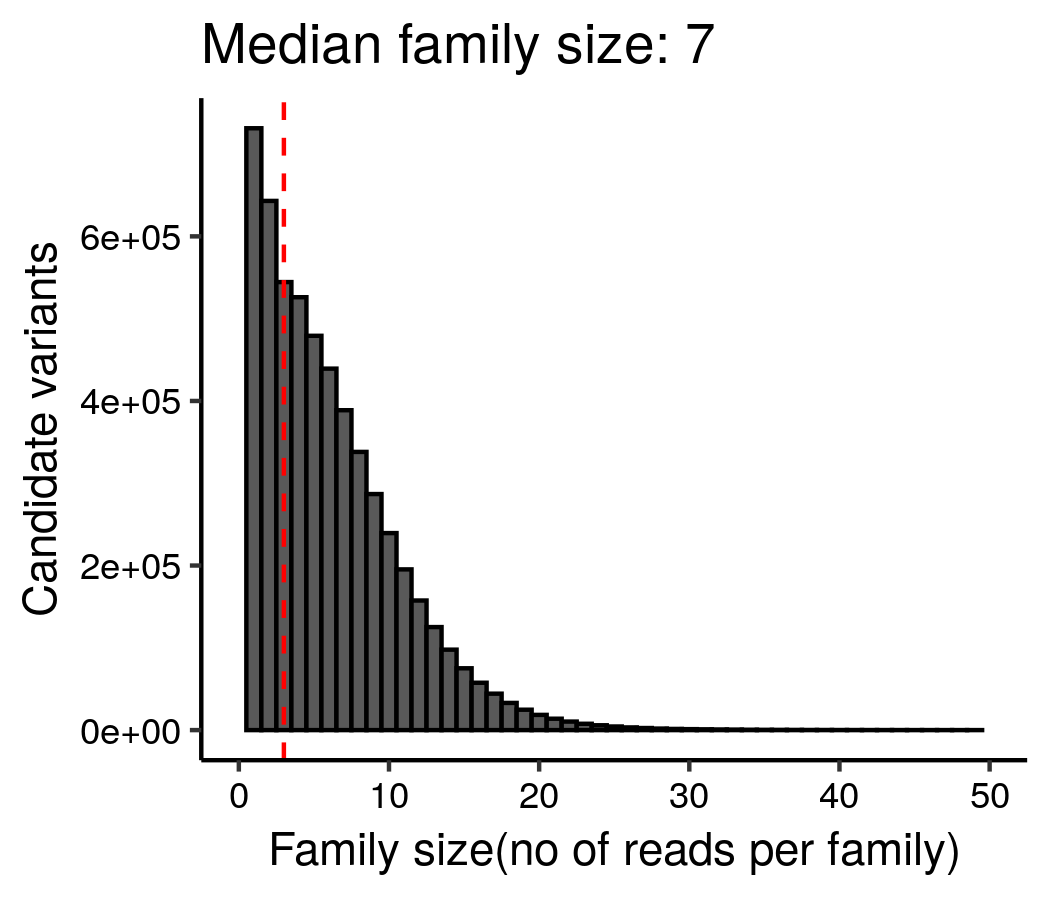

In [24]:
m<-median(subset(DN9_HSC_Consensus.raw,FamSize>=3)$FamSize)
ggplot(DN9_HSC_Consensus.raw)+aes(FamSize)+geom_histogram(binwidth=1,color="black")+xlim(0,50)+theme_classic()+geom_vline(xintercept=3,linetype=2,color="red")+labs(x="Consensus family size")+
    labs(x="Family size(no of reads per family)",y="Candidate variants")+theme(axis.text = element_text(color="black"))+ggtitle(paste("Median family size:",m))

In [ ]:
DN9_HSC_HPC_BMMC_mitoTracing.Sensitive<-readRDS("/lab/solexa_weissman/cweng/Projects/MitoTracing_Velocity/SecondaryAnalysis/Donor4Donor9/RDS/DN9_HSC_HPC_BMMC_mitoTracing.Sensitive")

# Variant level, potential lineage bias

In [162]:
## Recode the cell type into general lineage
table(HSC_HPC_BMMC_mitoTracing.verysensitive@CellMeta$CellType)

ERROR: Error in table(HSC_HPC_BMMC_mitoTracing.verysensitive@CellMeta$CellType): object 'HSC_HPC_BMMC_mitoTracing.verysensitive' not found
